In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Activation,Input,InputLayer
from tensorflow.keras import optimizers
from tensorflow.keras.models import Model
import tensorflow as tf
from plot_keras_history import show_history, plot_history

In [3]:
df = pd.read_csv('E:\\My files\\Dr Buzna\\trips\\NN\\NN-based_distance\\tripdf_sp_sps.csv', index_col=0)
print(df.shape)
df.tail()

(8282, 9)


,travel time,real travel time,euc_dist,distance,hour of day,O lat,O lon,D lat,D lon
8277,764,777.0,0.106760,13975.498,17,49.300370,18.785076,49.395589,18.833356
8278,1023,1033.0,0.107164,13882.472,9,49.300198,18.784969,49.201965,18.742139
8279,960,970.0,0.115124,12709.790,15,49.300306,18.784926,49.214926,18.707700
8280,1349,1418.0,0.138872,22283.246,18,49.300349,18.784947,49.438676,18.772652
8281,393,402.0,0.049918,6337.100,19,49.300177,18.784904,49.338404,18.817005


In [4]:
# cyclical feature transformation hour
df['hr_sin'] = np.sin(df['hour of day']*(2.*np.pi/24))
df['hr_cos'] = np.cos(df['hour of day']*(2.*np.pi/24))

In [5]:
# df = pd.merge(df0,df3, on = ['travel time','distance','hour of day'])
df = df.drop(['travel time','distance','O lat','O lon','D lat','D lon','hour of day'],axis=1)
df.rename(columns = {'real travel time':'travel time'}, inplace = True)
df = pd.concat([df.iloc[:,-5:].reset_index(drop=True) , df.iloc[:,0:-5].reset_index(drop=True)] , axis=1)
df.head(2)
df

,travel time,euc_dist,hr_sin,hr_cos
0,1082.0,0.123458,-0.866025,-5.000000e-01
1,1110.0,0.123591,-0.500000,8.660254e-01
2,780.0,0.119860,1.000000,6.123234e-17
3,1255.0,0.142752,-0.258819,-9.659258e-01
4,606.0,0.124537,-0.965926,-2.588190e-01
...,...,...,...,...
8277,777.0,0.106760,-0.965926,-2.588190e-01
8278,1033.0,0.107164,0.707107,-7.071068e-01
8279,970.0,0.115124,-0.707107,-7.071068e-01
8280,1418.0,0.138872,-1.000000,-1.836970e-16


In [39]:
# sns.lmplot(x='euc_dist',y='travel time',data=df, height=3, aspect=1.5)

In [40]:
# If you have multiple columns in your dataframe and would like to
# remove all rows that have outliers in at least one column,
# the following expression would do that in one shot.
# from scipy import stats
# df = df[(np.abs(stats.zscore(df['euc_dist'])) < 3)]
# df.shape

# NN-model

In [6]:
def nnmodel(*num_neuron,num_hlayers,Epoch):

    if num_hlayers == 1:
        model = Sequential()
        model.add(InputLayer(input_shape=(X_train.shape[1], )))
        model.add(Dense(num_neuron[0], activation='relu'))
        model.add(Dense(1))
    else:
        model = Sequential()
        model.add(InputLayer(input_shape=(X_train.shape[1], )))
        model.add(Dense(num_neuron[0], activation='relu'))
        model.add(Dense(num_neuron[1], activation='relu'))
        model.add(Dense(1))
    # model.compile(loss='mse', optimizer='adam')
    learning_rate = 0.5
    model.compile(optimizer='adam',
                  loss=tf.keras.metrics.mean_squared_error,
                  metrics=['mape',tf.keras.metrics.RootMeanSquaredError(name='rmse')])
    history = model.fit(X_train, y_train, verbose=1, epochs=Epoch,
                       validation_data=(X_test, y_test))
    print('minimum testing RMSE: ',min(history.history['val_rmse'])/60)
    print('minimum testing MAPE: ',min(history.history['val_mape'])/100)
    
    return history

In [7]:
def nnmodel_(*num_neuron,num_hlayers,Epoch):

    if num_hlayers == 1:
        model = Sequential()
        model.add(InputLayer(input_shape=(X_train.shape[1], )))
        model.add(Dense(num_neuron[0], activation='relu'))
        model.add(Dense(1))
    elif num_hlayers == 2:
        model = Sequential()
        model.add(InputLayer(input_shape=(X_train.shape[1], )))
        model.add(Dense(num_neuron[0], activation='relu'))
        model.add(Dense(num_neuron[1], activation='relu'))
        model.add(Dense(1))
    else:
        model = Sequential()
        model.add(InputLayer(input_shape=(X_train.shape[1], )))
        model.add(Dense(num_neuron[0], activation='relu'))
        model.add(Dense(num_neuron[1], activation='relu'))
        model.add(Dense(num_neuron[2], activation='relu'))
        model.add(Dense(1))        
    # model.compile(loss='mse', optimizer='adam')
    learning_rate = 0.5
    model.compile(optimizer='adam',
                  loss=tf.keras.metrics.mean_squared_error,
                  metrics=['mape',tf.keras.metrics.RootMeanSquaredError(name='rmse')])
    X_train0 = tf.convert_to_tensor(X_train,dtype = tf.float32)
    y_train0 = tf.convert_to_tensor(y_train,dtype = tf.float32)
    X_test0 = tf.convert_to_tensor(X_test,dtype = tf.float32)
    y_test0 = tf.convert_to_tensor(y_test,dtype = tf.float32)
    history = model.fit(X_train0, y_train0, verbose=1, epochs=Epoch,
                       validation_data=(X_test0, y_test0))   
    print('minimum testing RMSE: ',min(history.history['val_rmse'])/60)
    print('minimum testing MAPE: ',min(history.history['val_mape'])/100)
    
    return history

In [43]:
def plotme(model):

    # Plot the training and validation accuracy and loss at each epoch
    loss1 = [f/60 for f in model.history['rmse']]
    val_loss1 = [f/60 for f in model.history['val_rmse']]
    loss2 = model.history['mape']
    val_loss2 = model.history['val_mape']
    epochs = range(1, len(model.history['loss'])+1)
    plt.figure(figsize=(5, 3))
    plt.plot(epochs, val_loss1, 'r', label='Validation rmse')
    plt.plot(epochs, loss1, 'y', label='Trainnig rmse')
    plt.plot(epochs, val_loss2, 'k', label='Validation mape')
    plt.plot(epochs, loss2, 'b', label='Trainnig mape')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Metrics')
    #plt.xlim(lims)
    yli = max(model.history['val_mape'])
    plt.ylim([-1, yli+10])
    plt.legend()
    plt.show()

## sub-problem 1:     ******* input:distance *********

In [8]:
x = np.array(df[['euc_dist']])
y = np.array(df['travel time'])
# x

In [9]:
#split data into test & train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [10]:
print(X_train.shape)
print(X_test.shape)
# X_train

(6625, 1)
(1657, 1)


In [11]:
# inputs: distance
model1_1 = nnmodel(5, num_hlayers=1,Epoch=600)
model1_1

Epoch 1/600
208/208 [==============================] - 0s 1ms/step - loss: 861981.6875 - mape: 99.9653 - rmse: 928.4297 - val_loss: 856142.0000 - val_mape: 99.9296 - val_rmse: 925.2794
Epoch 2/600
208/208 [==============================] - 0s 965us/step - loss: 861124.4375 - mape: 99.8846 - rmse: 927.9679 - val_loss: 855119.2500 - val_mape: 99.8337 - val_rmse: 924.7266
Epoch 3/600
208/208 [==============================] - 0s 739us/step - loss: 859931.6875 - mape: 99.7718 - rmse: 927.3250 - val_loss: 853743.0000 - val_mape: 99.7044 - val_rmse: 923.9821
Epoch 4/600
208/208 [==============================] - 0s 750us/step - loss: 858380.5625 - mape: 99.6262 - rmse: 926.4883 - val_loss: 852026.6250 - val_mape: 99.5429 - val_rmse: 923.0529
Epoch 5/600
208/208 [==============================] - 0s 780us/step - loss: 856509.5625 - mape: 99.4489 - rmse: 925.4780 - val_loss: 849987.3125 - val_mape: 99.3505 - val_rmse: 921.9476
Epoch 6/600
208/208 [==============================] - 0s 795us/ste

Epoch 45/600
208/208 [==============================] - 0s 725us/step - loss: 631871.9375 - mape: 76.1373 - rmse: 794.9037 - val_loss: 622357.6250 - val_mape: 75.7471 - val_rmse: 788.8965
Epoch 46/600
208/208 [==============================] - 0s 787us/step - loss: 624073.3125 - mape: 75.2705 - rmse: 789.9831 - val_loss: 614556.0625 - val_mape: 74.8763 - val_rmse: 783.9363
Epoch 47/600
208/208 [==============================] - 0s 719us/step - loss: 616258.3125 - mape: 74.3934 - rmse: 785.0212 - val_loss: 606702.0625 - val_mape: 73.9987 - val_rmse: 778.9108
Epoch 48/600
208/208 [==============================] - 0s 733us/step - loss: 608358.5625 - mape: 73.5187 - rmse: 779.9734 - val_loss: 598784.6875 - val_mape: 73.1127 - val_rmse: 773.8118
Epoch 49/600
208/208 [==============================] - 0s 749us/step - loss: 600457.5625 - mape: 72.6382 - rmse: 774.8920 - val_loss: 590864.3750 - val_mape: 72.2206 - val_rmse: 768.6770
Epoch 50/600
208/208 [==============================] - 0s 7

208/208 [==============================] - 0s 765us/step - loss: 162302.1250 - mape: 48.8395 - rmse: 402.8674 - val_loss: 157459.5312 - val_mape: 48.6889 - val_rmse: 396.8117
Epoch 132/600
208/208 [==============================] - 0s 738us/step - loss: 161973.9375 - mape: 49.1218 - rmse: 402.4599 - val_loss: 157153.7812 - val_mape: 48.9402 - val_rmse: 396.4263
Epoch 133/600
208/208 [==============================] - 0s 723us/step - loss: 161682.1094 - mape: 49.3418 - rmse: 402.0971 - val_loss: 156880.7500 - val_mape: 49.1649 - val_rmse: 396.0818
Epoch 134/600
208/208 [==============================] - 0s 753us/step - loss: 161407.9062 - mape: 49.5655 - rmse: 401.7560 - val_loss: 156630.0156 - val_mape: 49.3732 - val_rmse: 395.7651
Epoch 135/600
208/208 [==============================] - 0s 755us/step - loss: 161169.0156 - mape: 49.7668 - rmse: 401.4586 - val_loss: 156403.8594 - val_mape: 49.5425 - val_rmse: 395.4793
Epoch 136/600
208/208 [==============================] - 0s 772us/ste

208/208 [==============================] - 0s 724us/step - loss: 146714.3281 - mape: 48.7214 - rmse: 383.0331 - val_loss: 141760.5938 - val_mape: 48.4022 - val_rmse: 376.5111
Epoch 218/600
208/208 [==============================] - 0s 724us/step - loss: 146543.8906 - mape: 48.6531 - rmse: 382.8105 - val_loss: 141584.4844 - val_mape: 48.3391 - val_rmse: 376.2771
Epoch 219/600
208/208 [==============================] - 0s 724us/step - loss: 146373.4375 - mape: 48.6248 - rmse: 382.5878 - val_loss: 141407.2812 - val_mape: 48.2968 - val_rmse: 376.0416
Epoch 220/600
208/208 [==============================] - 0s 748us/step - loss: 146198.5938 - mape: 48.5568 - rmse: 382.3593 - val_loss: 141229.3906 - val_mape: 48.2320 - val_rmse: 375.8050
Epoch 221/600
208/208 [==============================] - 0s 713us/step - loss: 146024.6562 - mape: 48.4815 - rmse: 382.1317 - val_loss: 141047.5469 - val_mape: 48.1841 - val_rmse: 375.5630
Epoch 222/600
208/208 [==============================] - 0s 725us/ste

208/208 [==============================] - 0s 782us/step - loss: 131390.5469 - mape: 45.2070 - rmse: 362.4783 - val_loss: 126040.0078 - val_mape: 44.9753 - val_rmse: 355.0211
Epoch 304/600
208/208 [==============================] - 0s 713us/step - loss: 131212.5781 - mape: 45.1187 - rmse: 362.2328 - val_loss: 125856.7891 - val_mape: 44.9150 - val_rmse: 354.7630
Epoch 305/600
208/208 [==============================] - 0s 808us/step - loss: 131035.7188 - mape: 45.1351 - rmse: 361.9886 - val_loss: 125673.8281 - val_mape: 44.8828 - val_rmse: 354.5050
Epoch 306/600
208/208 [==============================] - 0s 784us/step - loss: 130858.5078 - mape: 45.0617 - rmse: 361.7437 - val_loss: 125490.6719 - val_mape: 44.8027 - val_rmse: 354.2466
Epoch 307/600
208/208 [==============================] - 0s 744us/step - loss: 130681.2656 - mape: 44.9880 - rmse: 361.4986 - val_loss: 125306.7969 - val_mape: 44.7742 - val_rmse: 353.9870
Epoch 308/600
208/208 [==============================] - 0s 739us/ste

208/208 [==============================] - 0s 728us/step - loss: 116879.8203 - mape: 41.2267 - rmse: 341.8769 - val_loss: 111020.0469 - val_mape: 41.0570 - val_rmse: 333.1967
Epoch 390/600
208/208 [==============================] - 0s 683us/step - loss: 116719.3672 - mape: 41.1492 - rmse: 341.6422 - val_loss: 110851.5312 - val_mape: 40.9876 - val_rmse: 332.9437
Epoch 391/600
208/208 [==============================] - 0s 757us/step - loss: 116558.0859 - mape: 41.0369 - rmse: 341.4060 - val_loss: 110680.5391 - val_mape: 40.9022 - val_rmse: 332.6869
Epoch 392/600
208/208 [==============================] - 0s 706us/step - loss: 116401.0859 - mape: 41.0125 - rmse: 341.1760 - val_loss: 110516.2188 - val_mape: 40.8599 - val_rmse: 332.4398
Epoch 393/600
208/208 [==============================] - 0s 849us/step - loss: 116244.4141 - mape: 40.9226 - rmse: 340.9464 - val_loss: 110353.3438 - val_mape: 40.8052 - val_rmse: 332.1947
Epoch 394/600
208/208 [==============================] - 0s 790us/ste

208/208 [==============================] - 0s 724us/step - loss: 105501.1172 - mape: 36.9840 - rmse: 324.8094 - val_loss: 99020.0000 - val_mape: 36.9803 - val_rmse: 314.6744
Epoch 476/600
208/208 [==============================] - 0s 740us/step - loss: 105398.0781 - mape: 36.9878 - rmse: 324.6507 - val_loss: 98911.5547 - val_mape: 36.9265 - val_rmse: 314.5021
Epoch 477/600
208/208 [==============================] - 0s 744us/step - loss: 105299.7578 - mape: 36.8868 - rmse: 324.4992 - val_loss: 98805.2891 - val_mape: 36.8879 - val_rmse: 314.3331
Epoch 478/600
208/208 [==============================] - 0s 747us/step - loss: 105200.1953 - mape: 36.9011 - rmse: 324.3458 - val_loss: 98696.3047 - val_mape: 36.8491 - val_rmse: 314.1597
Epoch 479/600
208/208 [==============================] - 0s 709us/step - loss: 105100.5859 - mape: 36.8434 - rmse: 324.1922 - val_loss: 98587.9141 - val_mape: 36.7748 - val_rmse: 313.9871
Epoch 480/600
208/208 [==============================] - 0s 720us/step - l

Epoch 519/600
208/208 [==============================] - 0s 765us/step - loss: 101936.5859 - mape: 35.3108 - rmse: 319.2751 - val_loss: 95156.9219 - val_mape: 35.3338 - val_rmse: 308.4752
Epoch 520/600
208/208 [==============================] - 0s 782us/step - loss: 101867.6094 - mape: 35.2336 - rmse: 319.1671 - val_loss: 95080.3906 - val_mape: 35.2855 - val_rmse: 308.3511
Epoch 521/600
208/208 [==============================] - 0s 747us/step - loss: 101801.6953 - mape: 35.2016 - rmse: 319.0638 - val_loss: 95005.9062 - val_mape: 35.2406 - val_rmse: 308.2303
Epoch 522/600
208/208 [==============================] - 0s 739us/step - loss: 101735.1016 - mape: 35.2065 - rmse: 318.9594 - val_loss: 94929.9297 - val_mape: 35.1976 - val_rmse: 308.1070
Epoch 523/600
208/208 [==============================] - 0s 759us/step - loss: 101667.6016 - mape: 35.1340 - rmse: 318.8536 - val_loss: 94857.2344 - val_mape: 35.1697 - val_rmse: 307.9890
Epoch 524/600
208/208 [==============================] - 0s 

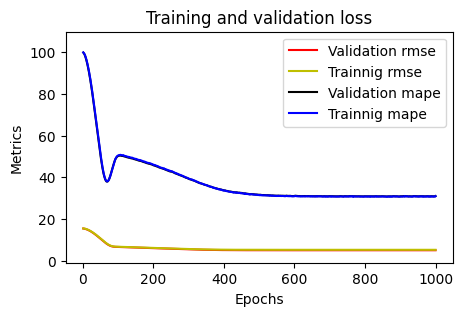

In [48]:
plotme(model1_1)

In [12]:
# inputs: distance
model1_2 = nnmodel(10, num_hlayers=1,Epoch=600)
model1_2

Epoch 1/600
208/208 [==============================] - 0s 990us/step - loss: 862064.8125 - mape: 99.9679 - rmse: 928.4744 - val_loss: 856111.1875 - val_mape: 99.9224 - val_rmse: 925.2628
Epoch 2/600
208/208 [==============================] - 0s 834us/step - loss: 860841.3125 - mape: 99.8537 - rmse: 927.8154 - val_loss: 854505.7500 - val_mape: 99.7703 - val_rmse: 924.3948
Epoch 3/600
208/208 [==============================] - 0s 760us/step - loss: 858869.0625 - mape: 99.6646 - rmse: 926.7519 - val_loss: 852156.6875 - val_mape: 99.5476 - val_rmse: 923.1234
Epoch 4/600
208/208 [==============================] - 0s 743us/step - loss: 856149.8750 - mape: 99.4052 - rmse: 925.2837 - val_loss: 849087.7500 - val_mape: 99.2563 - val_rmse: 921.4596
Epoch 5/600
208/208 [==============================] - 0s 738us/step - loss: 852770.7500 - mape: 99.0848 - rmse: 923.4559 - val_loss: 845374.1875 - val_mape: 98.9033 - val_rmse: 919.4423
Epoch 6/600
208/208 [==============================] - 0s 764us/s

Epoch 45/600
208/208 [==============================] - 0s 679us/step - loss: 467960.0312 - mape: 57.8236 - rmse: 684.0760 - val_loss: 456558.9688 - val_mape: 56.9278 - val_rmse: 675.6915
Epoch 46/600
208/208 [==============================] - 0s 700us/step - loss: 456334.4688 - mape: 56.5240 - rmse: 675.5253 - val_loss: 445022.8750 - val_mape: 55.6501 - val_rmse: 667.1003
Epoch 47/600
208/208 [==============================] - 0s 684us/step - loss: 444963.8125 - mape: 55.2542 - rmse: 667.0561 - val_loss: 433689.6875 - val_mape: 54.3961 - val_rmse: 658.5512
Epoch 48/600
208/208 [==============================] - 0s 684us/step - loss: 433681.2812 - mape: 53.9823 - rmse: 658.5448 - val_loss: 422459.7188 - val_mape: 53.1650 - val_rmse: 649.9690
Epoch 49/600
208/208 [==============================] - 0s 760us/step - loss: 422436.0625 - mape: 52.7410 - rmse: 649.9508 - val_loss: 411246.2188 - val_mape: 51.9457 - val_rmse: 641.2848
Epoch 50/600
208/208 [==============================] - 0s 6

208/208 [==============================] - 0s 724us/step - loss: 152670.9688 - mape: 49.6988 - rmse: 390.7313 - val_loss: 147793.3750 - val_mape: 49.4444 - val_rmse: 384.4390
Epoch 132/600
208/208 [==============================] - 0s 718us/step - loss: 152422.9375 - mape: 49.7860 - rmse: 390.4138 - val_loss: 147542.0156 - val_mape: 49.4059 - val_rmse: 384.1120
Epoch 133/600
208/208 [==============================] - 0s 778us/step - loss: 152173.4844 - mape: 49.6672 - rmse: 390.0942 - val_loss: 147289.5469 - val_mape: 49.3449 - val_rmse: 383.7832
Epoch 134/600
208/208 [==============================] - 0s 748us/step - loss: 151925.5312 - mape: 49.5881 - rmse: 389.7762 - val_loss: 147036.3906 - val_mape: 49.3075 - val_rmse: 383.4532
Epoch 135/600
208/208 [==============================] - 0s 768us/step - loss: 151677.9062 - mape: 49.5648 - rmse: 389.4585 - val_loss: 146781.7656 - val_mape: 49.2445 - val_rmse: 383.1211
Epoch 136/600
208/208 [==============================] - 0s 749us/ste

208/208 [==============================] - 0s 701us/step - loss: 131696.4062 - mape: 45.2759 - rmse: 362.9000 - val_loss: 126317.0859 - val_mape: 45.0525 - val_rmse: 355.4112
Epoch 218/600
208/208 [==============================] - 0s 757us/step - loss: 131441.5469 - mape: 45.2374 - rmse: 362.5487 - val_loss: 126053.1875 - val_mape: 44.9805 - val_rmse: 355.0397
Epoch 219/600
208/208 [==============================] - 0s 684us/step - loss: 131186.3281 - mape: 45.1137 - rmse: 362.1965 - val_loss: 125787.7578 - val_mape: 44.9077 - val_rmse: 354.6657
Epoch 220/600
208/208 [==============================] - 0s 756us/step - loss: 130933.3672 - mape: 45.1084 - rmse: 361.8472 - val_loss: 125527.3281 - val_mape: 44.8432 - val_rmse: 354.2984
Epoch 221/600
208/208 [==============================] - 0s 696us/step - loss: 130680.4688 - mape: 44.9245 - rmse: 361.4975 - val_loss: 125262.3516 - val_mape: 44.7590 - val_rmse: 353.9242
Epoch 222/600
208/208 [==============================] - 0s 669us/ste

208/208 [==============================] - 0s 608us/step - loss: 112302.6094 - mape: 39.7070 - rmse: 335.1158 - val_loss: 106201.2031 - val_mape: 39.5763 - val_rmse: 325.8853
Epoch 304/600
208/208 [==============================] - 0s 687us/step - loss: 112103.6719 - mape: 39.6402 - rmse: 334.8189 - val_loss: 105991.9688 - val_mape: 39.5290 - val_rmse: 325.5641
Epoch 305/600
208/208 [==============================] - 0s 683us/step - loss: 111903.5000 - mape: 39.5437 - rmse: 334.5198 - val_loss: 105783.5547 - val_mape: 39.4641 - val_rmse: 325.2438
Epoch 306/600
208/208 [==============================] - 0s 697us/step - loss: 111704.8594 - mape: 39.5074 - rmse: 334.2228 - val_loss: 105578.2422 - val_mape: 39.4182 - val_rmse: 324.9281
Epoch 307/600
208/208 [==============================] - 0s 686us/step - loss: 111508.9922 - mape: 39.4835 - rmse: 333.9296 - val_loss: 105371.8359 - val_mape: 39.3497 - val_rmse: 324.6103
Epoch 308/600
208/208 [==============================] - 0s 681us/ste

Epoch 390/600
208/208 [==============================] - 0s 799us/step - loss: 100676.5469 - mape: 34.4516 - rmse: 317.2957 - val_loss: 93729.9141 - val_mape: 34.5451 - val_rmse: 306.1534
Epoch 391/600
208/208 [==============================] - 0s 731us/step - loss: 100600.7969 - mape: 34.4200 - rmse: 317.1763 - val_loss: 93648.4922 - val_mape: 34.5148 - val_rmse: 306.0204
Epoch 392/600
208/208 [==============================] - 0s 777us/step - loss: 100527.6172 - mape: 34.4870 - rmse: 317.0609 - val_loss: 93564.8828 - val_mape: 34.4631 - val_rmse: 305.8838
Epoch 393/600
208/208 [==============================] - 0s 749us/step - loss: 100455.3672 - mape: 34.3074 - rmse: 316.9470 - val_loss: 93482.7969 - val_mape: 34.4191 - val_rmse: 305.7496
Epoch 394/600
208/208 [==============================] - 0s 755us/step - loss: 100383.4531 - mape: 34.3083 - rmse: 316.8335 - val_loss: 93403.7422 - val_mape: 34.3783 - val_rmse: 305.6203
Epoch 395/600
208/208 [==============================] - 0s 

Epoch 434/600
208/208 [==============================] - 0s 773us/step - loss: 98537.0547 - mape: 32.8724 - rmse: 313.9061 - val_loss: 91250.5859 - val_mape: 32.9464 - val_rmse: 302.0771
Epoch 435/600
208/208 [==============================] - 0s 804us/step - loss: 98507.4453 - mape: 32.7952 - rmse: 313.8589 - val_loss: 91212.0156 - val_mape: 32.8954 - val_rmse: 302.0133
Epoch 436/600
208/208 [==============================] - 0s 677us/step - loss: 98484.3906 - mape: 32.7450 - rmse: 313.8222 - val_loss: 91173.5312 - val_mape: 32.8276 - val_rmse: 301.9496
Epoch 437/600
208/208 [==============================] - 0s 701us/step - loss: 98457.0703 - mape: 32.7912 - rmse: 313.7787 - val_loss: 91157.8203 - val_mape: 32.9021 - val_rmse: 301.9235
Epoch 438/600
208/208 [==============================] - 0s 723us/step - loss: 98432.1641 - mape: 32.8127 - rmse: 313.7390 - val_loss: 91127.2422 - val_mape: 32.8796 - val_rmse: 301.8729
Epoch 439/600
208/208 [==============================] - 0s 726us

Epoch 478/600
208/208 [==============================] - 0s 747us/step - loss: 97769.1719 - mape: 31.9413 - rmse: 312.6806 - val_loss: 90262.6406 - val_mape: 32.0586 - val_rmse: 300.4374
Epoch 479/600
208/208 [==============================] - 0s 719us/step - loss: 97760.0312 - mape: 31.9149 - rmse: 312.6660 - val_loss: 90249.9453 - val_mape: 32.0537 - val_rmse: 300.4163
Epoch 480/600
208/208 [==============================] - 0s 726us/step - loss: 97749.2500 - mape: 31.8886 - rmse: 312.6488 - val_loss: 90228.9141 - val_mape: 31.9874 - val_rmse: 300.3813
Epoch 481/600
208/208 [==============================] - 0s 724us/step - loss: 97739.8359 - mape: 31.8385 - rmse: 312.6337 - val_loss: 90211.7500 - val_mape: 31.9495 - val_rmse: 300.3527
Epoch 482/600
208/208 [==============================] - 0s 725us/step - loss: 97733.9141 - mape: 31.7828 - rmse: 312.6242 - val_loss: 90197.3281 - val_mape: 31.9218 - val_rmse: 300.3287
Epoch 483/600
208/208 [==============================] - 0s 756us

Epoch 522/600
208/208 [==============================] - 0s 725us/step - loss: 97514.7344 - mape: 31.3215 - rmse: 312.2735 - val_loss: 89855.5469 - val_mape: 31.4433 - val_rmse: 299.7592
Epoch 523/600
208/208 [==============================] - 0s 723us/step - loss: 97513.8984 - mape: 31.3332 - rmse: 312.2722 - val_loss: 89856.3750 - val_mape: 31.4700 - val_rmse: 299.7605
Epoch 524/600
208/208 [==============================] - 0s 720us/step - loss: 97510.1016 - mape: 31.3303 - rmse: 312.2661 - val_loss: 89847.8828 - val_mape: 31.4393 - val_rmse: 299.7464
Epoch 525/600
208/208 [==============================] - 0s 721us/step - loss: 97509.9297 - mape: 31.3121 - rmse: 312.2658 - val_loss: 89837.4375 - val_mape: 31.3972 - val_rmse: 299.7289
Epoch 526/600
208/208 [==============================] - 0s 737us/step - loss: 97506.5938 - mape: 31.2590 - rmse: 312.2605 - val_loss: 89836.0469 - val_mape: 31.4100 - val_rmse: 299.7266
Epoch 527/600
208/208 [==============================] - 0s 706us

Epoch 566/600
208/208 [==============================] - 0s 638us/step - loss: 97445.1094 - mape: 31.0161 - rmse: 312.1620 - val_loss: 89704.5078 - val_mape: 31.1497 - val_rmse: 299.5071
Epoch 567/600
208/208 [==============================] - 0s 705us/step - loss: 97447.8125 - mape: 31.0036 - rmse: 312.1663 - val_loss: 89697.8828 - val_mape: 31.1161 - val_rmse: 299.4961
Epoch 568/600
208/208 [==============================] - 0s 639us/step - loss: 97442.6875 - mape: 31.0334 - rmse: 312.1581 - val_loss: 89703.4141 - val_mape: 31.1603 - val_rmse: 299.5053
Epoch 569/600
208/208 [==============================] - 0s 661us/step - loss: 97441.7031 - mape: 31.0277 - rmse: 312.1565 - val_loss: 89700.7578 - val_mape: 31.1506 - val_rmse: 299.5009
Epoch 570/600
208/208 [==============================] - 0s 675us/step - loss: 97441.7734 - mape: 31.0241 - rmse: 312.1566 - val_loss: 89699.7969 - val_mape: 31.1523 - val_rmse: 299.4992
Epoch 571/600
208/208 [==============================] - 0s 676us

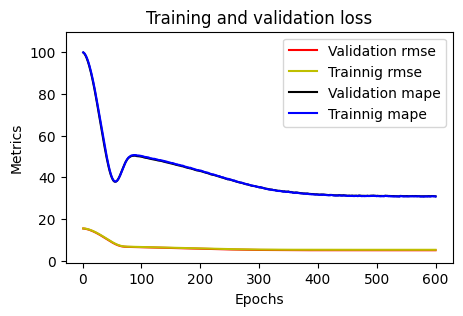

In [50]:
plotme(model1_2)

In [13]:
# inputs: distance
model1_3 = nnmodel(20, num_hlayers=1,Epoch=600)
model1_3

Epoch 1/600
208/208 [==============================] - 0s 1ms/step - loss: 861504.5000 - mape: 99.9183 - rmse: 928.1727 - val_loss: 854796.8750 - val_mape: 99.8055 - val_rmse: 924.5522
Epoch 2/600
208/208 [==============================] - 0s 773us/step - loss: 858127.0625 - mape: 99.6060 - rmse: 926.3515 - val_loss: 850021.8125 - val_mape: 99.3581 - val_rmse: 921.9662
Epoch 3/600
208/208 [==============================] - 0s 773us/step - loss: 852049.9375 - mape: 99.0282 - rmse: 923.0655 - val_loss: 842670.2500 - val_mape: 98.6643 - val_rmse: 917.9707
Epoch 4/600
208/208 [==============================] - 0s 747us/step - loss: 843523.1250 - mape: 98.2241 - rmse: 918.4351 - val_loss: 832923.3750 - val_mape: 97.7377 - val_rmse: 912.6464
Epoch 5/600
208/208 [==============================] - 0s 782us/step - loss: 832678.6875 - mape: 97.1847 - rmse: 912.5123 - val_loss: 820994.5000 - val_mape: 96.5938 - val_rmse: 906.0875
Epoch 6/600
208/208 [==============================] - 0s 751us/ste

Epoch 45/600
208/208 [==============================] - 0s 730us/step - loss: 168542.8281 - mape: 44.6418 - rmse: 410.5397 - val_loss: 162404.1875 - val_mape: 44.9834 - val_rmse: 402.9940
Epoch 46/600
208/208 [==============================] - 0s 736us/step - loss: 166080.1719 - mape: 45.6594 - rmse: 407.5294 - val_loss: 160268.7656 - val_mape: 45.9241 - val_rmse: 400.3358
Epoch 47/600
208/208 [==============================] - 0s 718us/step - loss: 164234.2344 - mape: 46.5343 - rmse: 405.2582 - val_loss: 158698.4531 - val_mape: 46.7499 - val_rmse: 398.3698
Epoch 48/600
208/208 [==============================] - 0s 702us/step - loss: 162762.3438 - mape: 47.4467 - rmse: 403.4381 - val_loss: 157451.2812 - val_mape: 47.5296 - val_rmse: 396.8013
Epoch 49/600
208/208 [==============================] - 0s 773us/step - loss: 161660.5469 - mape: 48.1684 - rmse: 402.0703 - val_loss: 156512.2656 - val_mape: 48.2046 - val_rmse: 395.6163
Epoch 50/600
208/208 [==============================] - 0s 7

208/208 [==============================] - 0s 757us/step - loss: 124506.2734 - mape: 43.4217 - rmse: 352.8545 - val_loss: 118785.8516 - val_mape: 43.2156 - val_rmse: 344.6532
Epoch 132/600
208/208 [==============================] - 0s 725us/step - loss: 124043.7656 - mape: 43.2215 - rmse: 352.1985 - val_loss: 118300.8359 - val_mape: 43.0080 - val_rmse: 343.9489
Epoch 133/600
208/208 [==============================] - 0s 725us/step - loss: 123582.9375 - mape: 43.1992 - rmse: 351.5436 - val_loss: 117831.3516 - val_mape: 42.9348 - val_rmse: 343.2657
Epoch 134/600
208/208 [==============================] - 0s 723us/step - loss: 123126.6953 - mape: 42.9365 - rmse: 350.8941 - val_loss: 117356.2422 - val_mape: 42.7860 - val_rmse: 342.5730
Epoch 135/600
208/208 [==============================] - 0s 677us/step - loss: 122683.8281 - mape: 42.8363 - rmse: 350.2625 - val_loss: 116901.1719 - val_mape: 42.6702 - val_rmse: 341.9081
Epoch 136/600
208/208 [==============================] - 0s 773us/ste

Epoch 218/600
208/208 [==============================] - 0s 693us/step - loss: 99297.7031 - mape: 33.6314 - rmse: 315.1154 - val_loss: 92133.6797 - val_mape: 33.6208 - val_rmse: 303.5353
Epoch 219/600
208/208 [==============================] - 0s 723us/step - loss: 99214.4297 - mape: 33.4631 - rmse: 314.9832 - val_loss: 92030.4766 - val_mape: 33.5261 - val_rmse: 303.3653
Epoch 220/600
208/208 [==============================] - 0s 712us/step - loss: 99127.0938 - mape: 33.4115 - rmse: 314.8445 - val_loss: 91925.8203 - val_mape: 33.3982 - val_rmse: 303.1927
Epoch 221/600
208/208 [==============================] - 0s 731us/step - loss: 99053.0078 - mape: 33.3131 - rmse: 314.7269 - val_loss: 91826.8906 - val_mape: 33.3076 - val_rmse: 303.0295
Epoch 222/600
208/208 [==============================] - 0s 709us/step - loss: 98975.3594 - mape: 33.0831 - rmse: 314.6035 - val_loss: 91735.8125 - val_mape: 33.2402 - val_rmse: 302.8792
Epoch 223/600
208/208 [==============================] - 0s 724us

Epoch 262/600
208/208 [==============================] - 0s 752us/step - loss: 97622.2344 - mape: 31.6609 - rmse: 312.4456 - val_loss: 90023.6406 - val_mape: 31.6922 - val_rmse: 300.0394
Epoch 263/600
208/208 [==============================] - 0s 721us/step - loss: 97614.5078 - mape: 31.5495 - rmse: 312.4332 - val_loss: 90013.7578 - val_mape: 31.7165 - val_rmse: 300.0229
Epoch 264/600
208/208 [==============================] - 0s 723us/step - loss: 97602.1719 - mape: 31.6886 - rmse: 312.4135 - val_loss: 90017.9922 - val_mape: 31.8131 - val_rmse: 300.0300
Epoch 265/600
208/208 [==============================] - 0s 746us/step - loss: 97594.2734 - mape: 31.6478 - rmse: 312.4008 - val_loss: 90000.6250 - val_mape: 31.7763 - val_rmse: 300.0010
Epoch 266/600
208/208 [==============================] - 0s 698us/step - loss: 97588.3438 - mape: 31.5578 - rmse: 312.3913 - val_loss: 89987.3516 - val_mape: 31.7514 - val_rmse: 299.9789
Epoch 267/600
208/208 [==============================] - 0s 724us

Epoch 306/600
208/208 [==============================] - 0s 677us/step - loss: 97453.4531 - mape: 31.1454 - rmse: 312.1754 - val_loss: 89699.9844 - val_mape: 31.1588 - val_rmse: 299.4995
Epoch 307/600
208/208 [==============================] - 0s 725us/step - loss: 97445.5625 - mape: 31.0557 - rmse: 312.1627 - val_loss: 89683.3984 - val_mape: 31.0726 - val_rmse: 299.4719
Epoch 308/600
208/208 [==============================] - 0s 749us/step - loss: 97443.6250 - mape: 31.0906 - rmse: 312.1596 - val_loss: 89702.1094 - val_mape: 31.1981 - val_rmse: 299.5031
Epoch 309/600
208/208 [==============================] - 0s 700us/step - loss: 97439.4375 - mape: 31.1323 - rmse: 312.1529 - val_loss: 89689.3750 - val_mape: 31.1364 - val_rmse: 299.4818
Epoch 310/600
208/208 [==============================] - 0s 725us/step - loss: 97439.1875 - mape: 30.9774 - rmse: 312.1525 - val_loss: 89685.7344 - val_mape: 31.1270 - val_rmse: 299.4758
Epoch 311/600
208/208 [==============================] - 0s 676us

Epoch 350/600
208/208 [==============================] - 0s 737us/step - loss: 97424.1328 - mape: 30.7934 - rmse: 312.1284 - val_loss: 89628.6562 - val_mape: 30.9808 - val_rmse: 299.3805
Epoch 351/600
208/208 [==============================] - 0s 725us/step - loss: 97426.2266 - mape: 30.8718 - rmse: 312.1317 - val_loss: 89633.6797 - val_mape: 31.0093 - val_rmse: 299.3889
Epoch 352/600
208/208 [==============================] - 0s 675us/step - loss: 97422.1250 - mape: 30.8906 - rmse: 312.1252 - val_loss: 89622.7500 - val_mape: 30.9517 - val_rmse: 299.3706
Epoch 353/600
208/208 [==============================] - 0s 725us/step - loss: 97425.2109 - mape: 30.8756 - rmse: 312.1301 - val_loss: 89625.2812 - val_mape: 30.9655 - val_rmse: 299.3748
Epoch 354/600
208/208 [==============================] - 0s 726us/step - loss: 97425.9844 - mape: 30.8189 - rmse: 312.1313 - val_loss: 89626.5547 - val_mape: 30.9762 - val_rmse: 299.3770
Epoch 355/600
208/208 [==============================] - 0s 723us

Epoch 394/600
208/208 [==============================] - 0s 725us/step - loss: 97426.3672 - mape: 30.9731 - rmse: 312.1320 - val_loss: 89619.4219 - val_mape: 30.9705 - val_rmse: 299.3650
Epoch 395/600
208/208 [==============================] - 0s 725us/step - loss: 97426.8359 - mape: 30.8771 - rmse: 312.1327 - val_loss: 89606.7109 - val_mape: 30.9008 - val_rmse: 299.3438
Epoch 396/600
208/208 [==============================] - 0s 750us/step - loss: 97424.8750 - mape: 30.7071 - rmse: 312.1296 - val_loss: 89612.5625 - val_mape: 30.9345 - val_rmse: 299.3536
Epoch 397/600
208/208 [==============================] - 0s 698us/step - loss: 97426.7344 - mape: 30.9020 - rmse: 312.1326 - val_loss: 89615.4531 - val_mape: 30.9483 - val_rmse: 299.3584
Epoch 398/600
208/208 [==============================] - 0s 755us/step - loss: 97425.5469 - mape: 30.8790 - rmse: 312.1306 - val_loss: 89606.5547 - val_mape: 30.9009 - val_rmse: 299.3435
Epoch 399/600
208/208 [==============================] - 0s 713us

Epoch 438/600
208/208 [==============================] - 0s 675us/step - loss: 97427.4297 - mape: 30.9569 - rmse: 312.1337 - val_loss: 89629.0156 - val_mape: 31.0221 - val_rmse: 299.3810
Epoch 439/600
208/208 [==============================] - 0s 723us/step - loss: 97427.7969 - mape: 30.8581 - rmse: 312.1342 - val_loss: 89601.1562 - val_mape: 30.8820 - val_rmse: 299.3345
Epoch 440/600
208/208 [==============================] - 0s 716us/step - loss: 97423.0000 - mape: 30.7864 - rmse: 312.1266 - val_loss: 89608.8047 - val_mape: 30.9250 - val_rmse: 299.3473
Epoch 441/600
208/208 [==============================] - 0s 768us/step - loss: 97424.3516 - mape: 30.8045 - rmse: 312.1288 - val_loss: 89616.5469 - val_mape: 30.9632 - val_rmse: 299.3602
Epoch 442/600
208/208 [==============================] - 0s 722us/step - loss: 97425.5547 - mape: 30.7468 - rmse: 312.1307 - val_loss: 89617.4688 - val_mape: 30.9671 - val_rmse: 299.3618
Epoch 443/600
208/208 [==============================] - 0s 721us

Epoch 482/600
208/208 [==============================] - 0s 700us/step - loss: 97424.7422 - mape: 30.6060 - rmse: 312.1294 - val_loss: 89595.8594 - val_mape: 30.8613 - val_rmse: 299.3257
Epoch 483/600
208/208 [==============================] - 0s 644us/step - loss: 97428.1484 - mape: 30.7996 - rmse: 312.1348 - val_loss: 89605.3047 - val_mape: 30.9120 - val_rmse: 299.3415
Epoch 484/600
208/208 [==============================] - 0s 676us/step - loss: 97426.2031 - mape: 30.7204 - rmse: 312.1317 - val_loss: 89597.0625 - val_mape: 30.8661 - val_rmse: 299.3277
Epoch 485/600
208/208 [==============================] - 0s 724us/step - loss: 97426.7188 - mape: 30.6933 - rmse: 312.1325 - val_loss: 89588.0547 - val_mape: 30.8049 - val_rmse: 299.3126
Epoch 486/600
208/208 [==============================] - 0s 676us/step - loss: 97426.6797 - mape: 30.7426 - rmse: 312.1325 - val_loss: 89593.0312 - val_mape: 30.8376 - val_rmse: 299.3210
Epoch 487/600
208/208 [==============================] - 0s 739us

Epoch 526/600
208/208 [==============================] - 0s 678us/step - loss: 97424.9141 - mape: 30.9035 - rmse: 312.1296 - val_loss: 89606.5547 - val_mape: 30.9166 - val_rmse: 299.3435
Epoch 527/600
208/208 [==============================] - 0s 724us/step - loss: 97425.6172 - mape: 30.7505 - rmse: 312.1308 - val_loss: 89603.6172 - val_mape: 30.9014 - val_rmse: 299.3386
Epoch 528/600
208/208 [==============================] - 0s 676us/step - loss: 97424.6328 - mape: 30.8907 - rmse: 312.1292 - val_loss: 89595.3438 - val_mape: 30.8538 - val_rmse: 299.3248
Epoch 529/600
208/208 [==============================] - 0s 725us/step - loss: 97422.6094 - mape: 30.6878 - rmse: 312.1259 - val_loss: 89592.1797 - val_mape: 30.8348 - val_rmse: 299.3195
Epoch 530/600
208/208 [==============================] - 0s 724us/step - loss: 97425.7656 - mape: 30.7828 - rmse: 312.1310 - val_loss: 89592.8281 - val_mape: 30.8406 - val_rmse: 299.3206
Epoch 531/600
208/208 [==============================] - 0s 754us

Epoch 570/600
208/208 [==============================] - 0s 675us/step - loss: 97436.1406 - mape: 30.8597 - rmse: 312.1476 - val_loss: 89632.1719 - val_mape: 31.0417 - val_rmse: 299.3863
Epoch 571/600
208/208 [==============================] - 0s 675us/step - loss: 97429.8594 - mape: 30.9955 - rmse: 312.1376 - val_loss: 89623.7188 - val_mape: 31.0066 - val_rmse: 299.3722
Epoch 572/600
208/208 [==============================] - 0s 676us/step - loss: 97426.7344 - mape: 30.8903 - rmse: 312.1326 - val_loss: 89599.9688 - val_mape: 30.8927 - val_rmse: 299.3326
Epoch 573/600
208/208 [==============================] - 0s 716us/step - loss: 97428.9062 - mape: 30.7555 - rmse: 312.1360 - val_loss: 89589.2812 - val_mape: 30.8336 - val_rmse: 299.3147
Epoch 574/600
208/208 [==============================] - 0s 676us/step - loss: 97422.4453 - mape: 30.7817 - rmse: 312.1257 - val_loss: 89590.8203 - val_mape: 30.8419 - val_rmse: 299.3173
Epoch 575/600
208/208 [==============================] - 0s 720us

In [14]:
# inputs: distance
model1_4 = nnmodel(10,5, num_hlayers=2,Epoch=600)
model1_4

Epoch 1/600
208/208 [==============================] - 0s 1ms/step - loss: 862215.1875 - mape: 99.9835 - rmse: 928.5554 - val_loss: 856582.9375 - val_mape: 99.9666 - val_rmse: 925.5176
Epoch 2/600
208/208 [==============================] - 0s 780us/step - loss: 861874.6250 - mape: 99.9499 - rmse: 928.3720 - val_loss: 856243.8125 - val_mape: 99.9333 - val_rmse: 925.3344
Epoch 3/600
208/208 [==============================] - 0s 817us/step - loss: 861536.1875 - mape: 99.9164 - rmse: 928.1898 - val_loss: 855905.4375 - val_mape: 99.8999 - val_rmse: 925.1516
Epoch 4/600
208/208 [==============================] - 0s 772us/step - loss: 861198.6250 - mape: 99.8831 - rmse: 928.0079 - val_loss: 855567.7500 - val_mape: 99.8668 - val_rmse: 924.9691
Epoch 5/600
208/208 [==============================] - 0s 773us/step - loss: 860859.4375 - mape: 99.8495 - rmse: 927.8251 - val_loss: 855228.8125 - val_mape: 99.8334 - val_rmse: 924.7858
Epoch 6/600
208/208 [==============================] - 0s 744us/ste

Epoch 45/600
208/208 [==============================] - 0s 772us/step - loss: 847386.8125 - mape: 98.5144 - rmse: 920.5361 - val_loss: 841772.5000 - val_mape: 98.5029 - val_rmse: 917.4816
Epoch 46/600
208/208 [==============================] - 0s 728us/step - loss: 847051.5000 - mape: 98.4812 - rmse: 920.3540 - val_loss: 841437.0625 - val_mape: 98.4696 - val_rmse: 917.2988
Epoch 47/600
208/208 [==============================] - 0s 741us/step - loss: 846716.4375 - mape: 98.4475 - rmse: 920.1719 - val_loss: 841102.6250 - val_mape: 98.4363 - val_rmse: 917.1165
Epoch 48/600
208/208 [==============================] - 0s 725us/step - loss: 846382.0625 - mape: 98.4142 - rmse: 919.9902 - val_loss: 840768.7500 - val_mape: 98.4031 - val_rmse: 916.9344
Epoch 49/600
208/208 [==============================] - 0s 723us/step - loss: 846047.8125 - mape: 98.3809 - rmse: 919.8086 - val_loss: 840434.1875 - val_mape: 98.3699 - val_rmse: 916.7520
Epoch 50/600
208/208 [==============================] - 0s 7

208/208 [==============================] - 0s 772us/step - loss: 818888.8125 - mape: 95.6435 - rmse: 904.9247 - val_loss: 813306.4375 - val_mape: 95.6426 - val_rmse: 901.8350
Epoch 132/600
208/208 [==============================] - 0s 774us/step - loss: 818561.1250 - mape: 95.6103 - rmse: 904.7437 - val_loss: 812979.4375 - val_mape: 95.6093 - val_rmse: 901.6537
Epoch 133/600
208/208 [==============================] - 0s 773us/step - loss: 818235.0625 - mape: 95.5768 - rmse: 904.5635 - val_loss: 812653.2500 - val_mape: 95.5762 - val_rmse: 901.4728
Epoch 134/600
208/208 [==============================] - 0s 769us/step - loss: 817906.8125 - mape: 95.5432 - rmse: 904.3820 - val_loss: 812325.6875 - val_mape: 95.5429 - val_rmse: 901.2911
Epoch 135/600
208/208 [==============================] - 0s 718us/step - loss: 817580.1250 - mape: 95.5104 - rmse: 904.2014 - val_loss: 812000.0000 - val_mape: 95.5098 - val_rmse: 901.1104
Epoch 136/600
208/208 [==============================] - 0s 772us/ste

208/208 [==============================] - 0s 768us/step - loss: 791029.6250 - mape: 92.7736 - rmse: 889.3984 - val_loss: 785479.5625 - val_mape: 92.7830 - val_rmse: 886.2728
Epoch 218/600
208/208 [==============================] - 0s 773us/step - loss: 790708.2500 - mape: 92.7403 - rmse: 889.2178 - val_loss: 785159.6250 - val_mape: 92.7498 - val_rmse: 886.0923
Epoch 219/600
208/208 [==============================] - 0s 771us/step - loss: 790388.7500 - mape: 92.7071 - rmse: 889.0381 - val_loss: 784839.0000 - val_mape: 92.7164 - val_rmse: 885.9114
Epoch 220/600
208/208 [==============================] - 0s 780us/step - loss: 790066.7500 - mape: 92.6732 - rmse: 888.8570 - val_loss: 784518.6250 - val_mape: 92.6831 - val_rmse: 885.7305
Epoch 221/600
208/208 [==============================] - 0s 750us/step - loss: 789747.4375 - mape: 92.6400 - rmse: 888.6774 - val_loss: 784199.0625 - val_mape: 92.6499 - val_rmse: 885.5502
Epoch 222/600
208/208 [==============================] - 0s 747us/ste

208/208 [==============================] - 0s 734us/step - loss: 763806.6250 - mape: 89.9042 - rmse: 873.9603 - val_loss: 758289.3125 - val_mape: 89.9240 - val_rmse: 870.7981
Epoch 304/600
208/208 [==============================] - 0s 726us/step - loss: 763494.5625 - mape: 89.8709 - rmse: 873.7817 - val_loss: 757977.6250 - val_mape: 89.8909 - val_rmse: 870.6191
Epoch 305/600
208/208 [==============================] - 0s 726us/step - loss: 763182.2500 - mape: 89.8378 - rmse: 873.6030 - val_loss: 757665.6875 - val_mape: 89.8577 - val_rmse: 870.4399
Epoch 306/600
208/208 [==============================] - 0s 773us/step - loss: 762869.2500 - mape: 89.8043 - rmse: 873.4239 - val_loss: 757353.0625 - val_mape: 89.8244 - val_rmse: 870.2603
Epoch 307/600
208/208 [==============================] - 0s 750us/step - loss: 762556.4375 - mape: 89.7710 - rmse: 873.2448 - val_loss: 757041.4375 - val_mape: 89.7912 - val_rmse: 870.0813
Epoch 308/600
208/208 [==============================] - 0s 725us/ste

208/208 [==============================] - 0s 775us/step - loss: 737218.9375 - mape: 87.0356 - rmse: 858.6146 - val_loss: 731734.6875 - val_mape: 87.0655 - val_rmse: 855.4149
Epoch 390/600
208/208 [==============================] - 0s 821us/step - loss: 736913.1875 - mape: 87.0022 - rmse: 858.4365 - val_loss: 731428.7500 - val_mape: 87.0322 - val_rmse: 855.2361
Epoch 391/600
208/208 [==============================] - 0s 829us/step - loss: 736606.0000 - mape: 86.9685 - rmse: 858.2575 - val_loss: 731122.3750 - val_mape: 86.9988 - val_rmse: 855.0569
Epoch 392/600
208/208 [==============================] - 0s 750us/step - loss: 736300.5625 - mape: 86.9353 - rmse: 858.0796 - val_loss: 730817.6875 - val_mape: 86.9656 - val_rmse: 854.8788
Epoch 393/600
208/208 [==============================] - 0s 796us/step - loss: 735994.0625 - mape: 86.9017 - rmse: 857.9009 - val_loss: 730511.4375 - val_mape: 86.9322 - val_rmse: 854.6996
Epoch 394/600
208/208 [==============================] - 0s 797us/ste

208/208 [==============================] - 0s 768us/step - loss: 711283.9375 - mape: 84.1688 - rmse: 843.3765 - val_loss: 705831.5625 - val_mape: 84.2093 - val_rmse: 840.1378
Epoch 476/600
208/208 [==============================] - 0s 729us/step - loss: 710986.3125 - mape: 84.1356 - rmse: 843.2001 - val_loss: 705534.3125 - val_mape: 84.1761 - val_rmse: 839.9609
Epoch 477/600
208/208 [==============================] - 0s 773us/step - loss: 710687.8125 - mape: 84.1022 - rmse: 843.0230 - val_loss: 705236.2500 - val_mape: 84.1428 - val_rmse: 839.7834
Epoch 478/600
208/208 [==============================] - 0s 801us/step - loss: 710389.5000 - mape: 84.0689 - rmse: 842.8461 - val_loss: 704939.1875 - val_mape: 84.1097 - val_rmse: 839.6066
Epoch 479/600
208/208 [==============================] - 0s 793us/step - loss: 710091.1875 - mape: 84.0354 - rmse: 842.6691 - val_loss: 704641.0000 - val_mape: 84.0764 - val_rmse: 839.4290
Epoch 480/600
208/208 [==============================] - 0s 772us/ste

208/208 [==============================] - 0s 725us/step - loss: 685977.9375 - mape: 81.3024 - rmse: 828.2379 - val_loss: 680559.0000 - val_mape: 81.3532 - val_rmse: 824.9600
Epoch 562/600
208/208 [==============================] - 0s 724us/step - loss: 685688.1250 - mape: 81.2691 - rmse: 828.0629 - val_loss: 680269.5625 - val_mape: 81.3201 - val_rmse: 824.7845
Epoch 563/600
208/208 [==============================] - 0s 773us/step - loss: 685396.8125 - mape: 81.2356 - rmse: 827.8870 - val_loss: 679978.2500 - val_mape: 81.2867 - val_rmse: 824.6079
Epoch 564/600
208/208 [==============================] - 0s 775us/step - loss: 685106.3125 - mape: 81.2023 - rmse: 827.7115 - val_loss: 679688.1250 - val_mape: 81.2535 - val_rmse: 824.4320
Epoch 565/600
208/208 [==============================] - 0s 730us/step - loss: 684816.1250 - mape: 81.1690 - rmse: 827.5362 - val_loss: 679398.6875 - val_mape: 81.2203 - val_rmse: 824.2565
Epoch 566/600
208/208 [==============================] - 0s 726us/ste

In [15]:
# inputs: distance
model1_5 = nnmodel(20,10, num_hlayers=2,Epoch=600)
model1_5

Epoch 1/600
208/208 [==============================] - 0s 1ms/step - loss: 860678.4375 - mape: 99.8430 - rmse: 927.7275 - val_loss: 851639.8750 - val_mape: 99.5118 - val_rmse: 922.8434
Epoch 2/600
208/208 [==============================] - 0s 775us/step - loss: 847001.1250 - mape: 98.5643 - rmse: 920.3267 - val_loss: 826441.3750 - val_mape: 97.1272 - val_rmse: 909.0882
Epoch 3/600
208/208 [==============================] - 0s 772us/step - loss: 805811.5625 - mape: 94.5681 - rmse: 897.6700 - val_loss: 767410.6250 - val_mape: 91.3441 - val_rmse: 876.0198
Epoch 4/600
208/208 [==============================] - 0s 788us/step - loss: 728012.2500 - mape: 86.6084 - rmse: 853.2363 - val_loss: 670339.9375 - val_mape: 81.1792 - val_rmse: 818.7429
Epoch 5/600
208/208 [==============================] - 0s 806us/step - loss: 611632.4375 - mape: 74.0259 - rmse: 782.0693 - val_loss: 536072.3750 - val_mape: 66.1409 - val_rmse: 732.1696
Epoch 6/600
208/208 [==============================] - 0s 773us/ste

Epoch 45/600
208/208 [==============================] - 0s 799us/step - loss: 103511.0078 - mape: 36.2539 - rmse: 321.7313 - val_loss: 96314.9922 - val_mape: 35.8735 - val_rmse: 310.3466
Epoch 46/600
208/208 [==============================] - 0s 771us/step - loss: 102525.7031 - mape: 35.6907 - rmse: 320.1964 - val_loss: 95349.6719 - val_mape: 35.6187 - val_rmse: 308.7874
Epoch 47/600
208/208 [==============================] - 0s 773us/step - loss: 101655.8359 - mape: 35.3596 - rmse: 318.8351 - val_loss: 94408.0625 - val_mape: 34.9562 - val_rmse: 307.2589
Epoch 48/600
208/208 [==============================] - 0s 822us/step - loss: 100883.0391 - mape: 34.7913 - rmse: 317.6209 - val_loss: 93643.2188 - val_mape: 34.7870 - val_rmse: 306.0118
Epoch 49/600
208/208 [==============================] - 0s 771us/step - loss: 100219.8203 - mape: 34.3194 - rmse: 316.5751 - val_loss: 92903.7500 - val_mape: 34.1623 - val_rmse: 304.8012
Epoch 50/600
208/208 [==============================] - 0s 784us/

208/208 [==============================] - 0s 760us/step - loss: 97454.9297 - mape: 30.9019 - rmse: 312.1777 - val_loss: 89566.2109 - val_mape: 30.6419 - val_rmse: 299.2762
Epoch 90/600
208/208 [==============================] - 0s 773us/step - loss: 97432.3359 - mape: 30.5621 - rmse: 312.1415 - val_loss: 89635.8047 - val_mape: 31.0592 - val_rmse: 299.3924
Epoch 91/600
208/208 [==============================] - 0s 748us/step - loss: 97491.7422 - mape: 31.0338 - rmse: 312.2367 - val_loss: 89646.5625 - val_mape: 31.1008 - val_rmse: 299.4104
Epoch 92/600
208/208 [==============================] - 0s 725us/step - loss: 97455.5547 - mape: 30.7878 - rmse: 312.1787 - val_loss: 89570.4531 - val_mape: 30.6243 - val_rmse: 299.2832
Epoch 93/600
208/208 [==============================] - 0s 772us/step - loss: 97463.8438 - mape: 30.6969 - rmse: 312.1920 - val_loss: 89600.3984 - val_mape: 30.8709 - val_rmse: 299.3333
Epoch 94/600
208/208 [==============================] - 0s 771us/step - loss: 97468

Epoch 133/600
208/208 [==============================] - 0s 753us/step - loss: 97471.5234 - mape: 30.6977 - rmse: 312.2043 - val_loss: 89605.6953 - val_mape: 30.8883 - val_rmse: 299.3421
Epoch 134/600
208/208 [==============================] - 0s 780us/step - loss: 97447.6172 - mape: 30.8672 - rmse: 312.1660 - val_loss: 89571.3984 - val_mape: 30.5282 - val_rmse: 299.2848
Epoch 135/600
208/208 [==============================] - 0s 757us/step - loss: 97475.9922 - mape: 30.6781 - rmse: 312.2115 - val_loss: 89574.3438 - val_mape: 30.6012 - val_rmse: 299.2897
Epoch 136/600
208/208 [==============================] - 0s 734us/step - loss: 97447.8359 - mape: 30.7470 - rmse: 312.1664 - val_loss: 89595.4688 - val_mape: 30.8272 - val_rmse: 299.3250
Epoch 137/600
208/208 [==============================] - 0s 773us/step - loss: 97457.4531 - mape: 30.8629 - rmse: 312.1818 - val_loss: 89636.1172 - val_mape: 31.0485 - val_rmse: 299.3929
Epoch 138/600
208/208 [==============================] - 0s 771us

Epoch 177/600
208/208 [==============================] - 0s 748us/step - loss: 97456.5938 - mape: 30.6836 - rmse: 312.1804 - val_loss: 89606.3125 - val_mape: 30.9032 - val_rmse: 299.3431
Epoch 178/600
208/208 [==============================] - 0s 735us/step - loss: 97451.8516 - mape: 30.6668 - rmse: 312.1728 - val_loss: 89639.3125 - val_mape: 31.0673 - val_rmse: 299.3983
Epoch 179/600
208/208 [==============================] - 0s 806us/step - loss: 97479.6250 - mape: 30.8394 - rmse: 312.2173 - val_loss: 89624.6250 - val_mape: 31.0045 - val_rmse: 299.3737
Epoch 180/600
208/208 [==============================] - 0s 773us/step - loss: 97449.8672 - mape: 30.9164 - rmse: 312.1696 - val_loss: 89579.2266 - val_mape: 30.7148 - val_rmse: 299.2979
Epoch 181/600
208/208 [==============================] - 0s 774us/step - loss: 97447.5859 - mape: 30.6480 - rmse: 312.1660 - val_loss: 89625.8281 - val_mape: 31.0094 - val_rmse: 299.3757
Epoch 182/600
208/208 [==============================] - 0s 772us

Epoch 221/600
208/208 [==============================] - 0s 774us/step - loss: 97444.2344 - mape: 30.7297 - rmse: 312.1606 - val_loss: 89629.7188 - val_mape: 31.0314 - val_rmse: 299.3822
Epoch 222/600
208/208 [==============================] - 0s 772us/step - loss: 97462.2109 - mape: 30.7323 - rmse: 312.1894 - val_loss: 89603.8594 - val_mape: 30.9090 - val_rmse: 299.3391
Epoch 223/600
208/208 [==============================] - 0s 774us/step - loss: 97449.2656 - mape: 30.8603 - rmse: 312.1686 - val_loss: 89606.6797 - val_mape: 30.9288 - val_rmse: 299.3438
Epoch 224/600
208/208 [==============================] - 0s 798us/step - loss: 97471.8828 - mape: 30.8069 - rmse: 312.2049 - val_loss: 89573.4766 - val_mape: 30.7200 - val_rmse: 299.2883
Epoch 225/600
208/208 [==============================] - 0s 739us/step - loss: 97439.1719 - mape: 30.6656 - rmse: 312.1525 - val_loss: 89575.8047 - val_mape: 30.7346 - val_rmse: 299.2922
Epoch 226/600
208/208 [==============================] - 0s 771us

Epoch 265/600
208/208 [==============================] - 0s 750us/step - loss: 97429.7812 - mape: 30.5679 - rmse: 312.1375 - val_loss: 89657.6328 - val_mape: 31.1405 - val_rmse: 299.4288
Epoch 266/600
208/208 [==============================] - 0s 780us/step - loss: 97456.0312 - mape: 30.8285 - rmse: 312.1795 - val_loss: 89614.0859 - val_mape: 30.9401 - val_rmse: 299.3561
Epoch 267/600
208/208 [==============================] - 0s 785us/step - loss: 97450.3516 - mape: 31.0256 - rmse: 312.1704 - val_loss: 89573.3906 - val_mape: 30.6780 - val_rmse: 299.2881
Epoch 268/600
208/208 [==============================] - 0s 757us/step - loss: 97451.5312 - mape: 30.6022 - rmse: 312.1723 - val_loss: 89605.1562 - val_mape: 30.9050 - val_rmse: 299.3412
Epoch 269/600
208/208 [==============================] - 0s 778us/step - loss: 97440.3203 - mape: 30.8243 - rmse: 312.1543 - val_loss: 89564.1094 - val_mape: 30.5753 - val_rmse: 299.2726
Epoch 270/600
208/208 [==============================] - 0s 792us

Epoch 309/600
208/208 [==============================] - 0s 774us/step - loss: 97444.1094 - mape: 30.9072 - rmse: 312.1604 - val_loss: 89579.6250 - val_mape: 30.7610 - val_rmse: 299.2986
Epoch 310/600
208/208 [==============================] - 0s 772us/step - loss: 97426.4922 - mape: 30.5686 - rmse: 312.1322 - val_loss: 89730.2109 - val_mape: 31.3809 - val_rmse: 299.5500
Epoch 311/600
208/208 [==============================] - 0s 803us/step - loss: 97450.6641 - mape: 30.9192 - rmse: 312.1709 - val_loss: 89574.3359 - val_mape: 30.7129 - val_rmse: 299.2897
Epoch 312/600
208/208 [==============================] - 0s 817us/step - loss: 97454.6328 - mape: 30.7551 - rmse: 312.1772 - val_loss: 89688.8828 - val_mape: 31.2536 - val_rmse: 299.4810
Epoch 313/600
208/208 [==============================] - 0s 768us/step - loss: 97465.9844 - mape: 30.7682 - rmse: 312.1954 - val_loss: 89625.4688 - val_mape: 31.0119 - val_rmse: 299.3751
Epoch 314/600
208/208 [==============================] - 0s 749us

Epoch 353/600
208/208 [==============================] - 0s 725us/step - loss: 97453.6172 - mape: 30.8103 - rmse: 312.1756 - val_loss: 89562.0625 - val_mape: 30.3988 - val_rmse: 299.2692
Epoch 354/600
208/208 [==============================] - 0s 785us/step - loss: 97448.5547 - mape: 30.7517 - rmse: 312.1675 - val_loss: 89589.3594 - val_mape: 30.8027 - val_rmse: 299.3148
Epoch 355/600
208/208 [==============================] - 0s 746us/step - loss: 97481.3594 - mape: 30.6908 - rmse: 312.2201 - val_loss: 89616.8438 - val_mape: 30.9647 - val_rmse: 299.3607
Epoch 356/600
208/208 [==============================] - 0s 774us/step - loss: 97439.4219 - mape: 30.8375 - rmse: 312.1529 - val_loss: 89571.9219 - val_mape: 30.6398 - val_rmse: 299.2857
Epoch 357/600
208/208 [==============================] - 0s 773us/step - loss: 97453.5391 - mape: 30.7267 - rmse: 312.1755 - val_loss: 89635.2031 - val_mape: 31.0503 - val_rmse: 299.3914
Epoch 358/600
208/208 [==============================] - 0s 782us

Epoch 397/600
208/208 [==============================] - 0s 797us/step - loss: 97419.9922 - mape: 30.9603 - rmse: 312.1218 - val_loss: 89589.1641 - val_mape: 30.3135 - val_rmse: 299.3145
Epoch 398/600
208/208 [==============================] - 0s 778us/step - loss: 97480.7969 - mape: 30.4781 - rmse: 312.2191 - val_loss: 89624.2734 - val_mape: 30.9550 - val_rmse: 299.3731
Epoch 399/600
208/208 [==============================] - 0s 791us/step - loss: 97460.6719 - mape: 30.7424 - rmse: 312.1869 - val_loss: 89634.5469 - val_mape: 31.0247 - val_rmse: 299.3903
Epoch 400/600
208/208 [==============================] - 0s 773us/step - loss: 97455.8672 - mape: 30.9064 - rmse: 312.1792 - val_loss: 89600.0781 - val_mape: 30.8175 - val_rmse: 299.3327
Epoch 401/600
208/208 [==============================] - 0s 774us/step - loss: 97436.1406 - mape: 30.8655 - rmse: 312.1476 - val_loss: 89580.2656 - val_mape: 30.2670 - val_rmse: 299.2996
Epoch 402/600
208/208 [==============================] - 0s 801us

Epoch 441/600
208/208 [==============================] - 0s 768us/step - loss: 97449.4297 - mape: 30.7236 - rmse: 312.1689 - val_loss: 89613.0938 - val_mape: 30.9625 - val_rmse: 299.3545
Epoch 442/600
208/208 [==============================] - 0s 783us/step - loss: 97453.2578 - mape: 30.8909 - rmse: 312.1750 - val_loss: 89572.9766 - val_mape: 30.7339 - val_rmse: 299.2874
Epoch 443/600
208/208 [==============================] - 0s 774us/step - loss: 97472.7656 - mape: 30.6701 - rmse: 312.2063 - val_loss: 89576.1172 - val_mape: 30.7488 - val_rmse: 299.2927
Epoch 444/600
208/208 [==============================] - 0s 770us/step - loss: 97449.6328 - mape: 30.7857 - rmse: 312.1693 - val_loss: 89575.2969 - val_mape: 30.7252 - val_rmse: 299.2913
Epoch 445/600
208/208 [==============================] - 0s 752us/step - loss: 97426.2891 - mape: 30.5642 - rmse: 312.1318 - val_loss: 89684.0859 - val_mape: 31.2373 - val_rmse: 299.4730
Epoch 446/600
208/208 [==============================] - 0s 798us

Epoch 485/600
208/208 [==============================] - 0s 808us/step - loss: 97441.7344 - mape: 30.9046 - rmse: 312.1566 - val_loss: 89593.0469 - val_mape: 30.8208 - val_rmse: 299.3210
Epoch 486/600
208/208 [==============================] - 0s 775us/step - loss: 97456.6094 - mape: 30.7895 - rmse: 312.1804 - val_loss: 89596.8594 - val_mape: 30.8503 - val_rmse: 299.3273
Epoch 487/600
208/208 [==============================] - 0s 796us/step - loss: 97443.9688 - mape: 30.7972 - rmse: 312.1602 - val_loss: 89576.8828 - val_mape: 30.7083 - val_rmse: 299.2940
Epoch 488/600
208/208 [==============================] - 0s 764us/step - loss: 97461.2109 - mape: 30.8119 - rmse: 312.1878 - val_loss: 89564.3672 - val_mape: 30.5137 - val_rmse: 299.2731
Epoch 489/600
208/208 [==============================] - 0s 801us/step - loss: 97422.7188 - mape: 30.4065 - rmse: 312.1261 - val_loss: 89758.9062 - val_mape: 31.4687 - val_rmse: 299.5979
Epoch 490/600
208/208 [==============================] - 0s 792us

Epoch 529/600
208/208 [==============================] - 0s 795us/step - loss: 97478.4062 - mape: 30.7312 - rmse: 312.2153 - val_loss: 89616.5000 - val_mape: 30.9694 - val_rmse: 299.3601
Epoch 530/600
208/208 [==============================] - 0s 785us/step - loss: 97445.3828 - mape: 30.6237 - rmse: 312.1624 - val_loss: 89696.9766 - val_mape: 31.2804 - val_rmse: 299.4945
Epoch 531/600
208/208 [==============================] - 0s 786us/step - loss: 97452.5859 - mape: 30.8756 - rmse: 312.1740 - val_loss: 89584.2734 - val_mape: 30.7807 - val_rmse: 299.3063
Epoch 532/600
208/208 [==============================] - 0s 828us/step - loss: 97442.2578 - mape: 30.6437 - rmse: 312.1574 - val_loss: 89657.2500 - val_mape: 31.1428 - val_rmse: 299.4282
Epoch 533/600
208/208 [==============================] - 0s 769us/step - loss: 97461.1797 - mape: 30.7963 - rmse: 312.1877 - val_loss: 89609.2812 - val_mape: 30.9378 - val_rmse: 299.3481
Epoch 534/600
208/208 [==============================] - 0s 774us

Epoch 573/600
208/208 [==============================] - 0s 790us/step - loss: 97459.7188 - mape: 30.8059 - rmse: 312.1854 - val_loss: 89590.0703 - val_mape: 30.8147 - val_rmse: 299.3160
Epoch 574/600
208/208 [==============================] - 0s 757us/step - loss: 97441.8438 - mape: 30.8469 - rmse: 312.1568 - val_loss: 89577.8281 - val_mape: 30.7089 - val_rmse: 299.2956
Epoch 575/600
208/208 [==============================] - 0s 771us/step - loss: 97440.1484 - mape: 30.8927 - rmse: 312.1541 - val_loss: 89573.8125 - val_mape: 30.6269 - val_rmse: 299.2888
Epoch 576/600
208/208 [==============================] - 0s 779us/step - loss: 97474.2812 - mape: 30.7779 - rmse: 312.2087 - val_loss: 89604.1250 - val_mape: 30.8922 - val_rmse: 299.3395
Epoch 577/600
208/208 [==============================] - 0s 756us/step - loss: 97478.9531 - mape: 30.6129 - rmse: 312.2162 - val_loss: 89598.1719 - val_mape: 30.8467 - val_rmse: 299.3295
Epoch 578/600
208/208 [==============================] - 0s 788us

In [16]:
# inputs: distance
model1_6 = nnmodel(2, num_hlayers=1,Epoch=600)
model1_6

Epoch 1/600
208/208 [==============================] - 0s 1ms/step - loss: 861643.4375 - mape: 99.9407 - rmse: 928.2475 - val_loss: 855639.6875 - val_mape: 99.8907 - val_rmse: 925.0079
Epoch 2/600
208/208 [==============================] - 0s 764us/step - loss: 860485.8125 - mape: 99.8341 - rmse: 927.6237 - val_loss: 854333.2500 - val_mape: 99.7688 - val_rmse: 924.3015
Epoch 3/600
208/208 [==============================] - 0s 752us/step - loss: 859022.5625 - mape: 99.6951 - rmse: 926.8347 - val_loss: 852714.3125 - val_mape: 99.6173 - val_rmse: 923.4253
Epoch 4/600
208/208 [==============================] - 0s 759us/step - loss: 857259.1875 - mape: 99.5287 - rmse: 925.8829 - val_loss: 850786.6250 - val_mape: 99.4365 - val_rmse: 922.3810
Epoch 5/600
208/208 [==============================] - 0s 736us/step - loss: 855175.8125 - mape: 99.3344 - rmse: 924.7571 - val_loss: 848544.3750 - val_mape: 99.2257 - val_rmse: 921.1647
Epoch 6/600
208/208 [==============================] - 0s 719us/ste

Epoch 45/600
208/208 [==============================] - 0s 726us/step - loss: 477420.7500 - mape: 58.9772 - rmse: 690.9564 - val_loss: 465948.6250 - val_mape: 58.0881 - val_rmse: 682.6043
Epoch 46/600
208/208 [==============================] - 0s 723us/step - loss: 465859.6562 - mape: 57.6944 - rmse: 682.5391 - val_loss: 454397.5000 - val_mape: 56.8034 - val_rmse: 674.0901
Epoch 47/600
208/208 [==============================] - 0s 731us/step - loss: 454269.1562 - mape: 56.4106 - rmse: 673.9949 - val_loss: 442880.6875 - val_mape: 55.5262 - val_rmse: 665.4928
Epoch 48/600
208/208 [==============================] - 0s 728us/step - loss: 442797.3438 - mape: 55.1181 - rmse: 665.4302 - val_loss: 431413.5312 - val_mape: 54.2553 - val_rmse: 656.8208
Epoch 49/600
208/208 [==============================] - 0s 760us/step - loss: 431336.8438 - mape: 53.8395 - rmse: 656.7624 - val_loss: 420051.3750 - val_mape: 53.0075 - val_rmse: 648.1137
Epoch 50/600
208/208 [==============================] - 0s 7

208/208 [==============================] - 0s 725us/step - loss: 151556.8594 - mape: 49.6183 - rmse: 389.3030 - val_loss: 146662.4688 - val_mape: 49.3172 - val_rmse: 382.9654
Epoch 132/600
208/208 [==============================] - 0s 724us/step - loss: 151305.8594 - mape: 49.5688 - rmse: 388.9805 - val_loss: 146407.2656 - val_mape: 49.2284 - val_rmse: 382.6320
Epoch 133/600
208/208 [==============================] - 0s 706us/step - loss: 151056.9688 - mape: 49.4837 - rmse: 388.6605 - val_loss: 146148.3281 - val_mape: 49.1733 - val_rmse: 382.2935
Epoch 134/600
208/208 [==============================] - 0s 674us/step - loss: 150805.0781 - mape: 49.4633 - rmse: 388.3363 - val_loss: 145893.7188 - val_mape: 49.1464 - val_rmse: 381.9604
Epoch 135/600
208/208 [==============================] - 0s 730us/step - loss: 150554.1094 - mape: 49.4399 - rmse: 388.0130 - val_loss: 145640.3906 - val_mape: 49.1107 - val_rmse: 381.6286
Epoch 136/600
208/208 [==============================] - 0s 696us/ste

208/208 [==============================] - 0s 756us/step - loss: 129875.6953 - mape: 44.7939 - rmse: 360.3827 - val_loss: 124437.5625 - val_mape: 44.5227 - val_rmse: 352.7571
Epoch 218/600
208/208 [==============================] - 0s 726us/step - loss: 129624.8594 - mape: 44.6893 - rmse: 360.0345 - val_loss: 124176.0938 - val_mape: 44.4457 - val_rmse: 352.3863
Epoch 219/600
208/208 [==============================] - 0s 724us/step - loss: 129375.8594 - mape: 44.6742 - rmse: 359.6886 - val_loss: 123917.0938 - val_mape: 44.3936 - val_rmse: 352.0186
Epoch 220/600
208/208 [==============================] - 0s 726us/step - loss: 129123.2891 - mape: 44.6053 - rmse: 359.3373 - val_loss: 123657.6328 - val_mape: 44.3451 - val_rmse: 351.6499
Epoch 221/600
208/208 [==============================] - 0s 724us/step - loss: 128869.2891 - mape: 44.4731 - rmse: 358.9837 - val_loss: 123394.2578 - val_mape: 44.2465 - val_rmse: 351.2752
Epoch 222/600
208/208 [==============================] - 0s 726us/ste

208/208 [==============================] - 0s 690us/step - loss: 110078.0938 - mape: 38.9020 - rmse: 331.7802 - val_loss: 103860.5703 - val_mape: 38.8241 - val_rmse: 322.2740
Epoch 304/600
208/208 [==============================] - 0s 692us/step - loss: 109890.8516 - mape: 38.8221 - rmse: 331.4979 - val_loss: 103662.2109 - val_mape: 38.7233 - val_rmse: 321.9662
Epoch 305/600
208/208 [==============================] - 0s 685us/step - loss: 109708.8125 - mape: 38.8293 - rmse: 331.2232 - val_loss: 103490.0391 - val_mape: 38.7381 - val_rmse: 321.6987
Epoch 306/600
208/208 [==============================] - 0s 715us/step - loss: 109541.5078 - mape: 38.7721 - rmse: 330.9706 - val_loss: 103306.6016 - val_mape: 38.6176 - val_rmse: 321.4135
Epoch 307/600
208/208 [==============================] - 0s 725us/step - loss: 109373.6562 - mape: 38.6538 - rmse: 330.7169 - val_loss: 103125.5625 - val_mape: 38.5511 - val_rmse: 321.1317
Epoch 308/600
208/208 [==============================] - 0s 773us/ste

Epoch 390/600
208/208 [==============================] - 0s 697us/step - loss: 99808.4688 - mape: 34.0660 - rmse: 315.9248 - val_loss: 92765.7891 - val_mape: 34.0916 - val_rmse: 304.5748
Epoch 391/600
208/208 [==============================] - 0s 688us/step - loss: 99755.5781 - mape: 33.9531 - rmse: 315.8411 - val_loss: 92702.1172 - val_mape: 34.0251 - val_rmse: 304.4702
Epoch 392/600
208/208 [==============================] - 0s 721us/step - loss: 99703.4219 - mape: 33.9194 - rmse: 315.7585 - val_loss: 92643.1406 - val_mape: 33.9968 - val_rmse: 304.3734
Epoch 393/600
208/208 [==============================] - 0s 742us/step - loss: 99653.9219 - mape: 33.8536 - rmse: 315.6801 - val_loss: 92580.3672 - val_mape: 33.9389 - val_rmse: 304.2702
Epoch 394/600
208/208 [==============================] - 0s 709us/step - loss: 99601.7734 - mape: 33.8411 - rmse: 315.5975 - val_loss: 92517.6797 - val_mape: 33.8795 - val_rmse: 304.1672
Epoch 395/600
208/208 [==============================] - 0s 716us

Epoch 434/600
208/208 [==============================] - 0s 710us/step - loss: 98199.7969 - mape: 32.6116 - rmse: 313.3685 - val_loss: 90843.7344 - val_mape: 32.6894 - val_rmse: 301.4030
Epoch 435/600
208/208 [==============================] - 0s 726us/step - loss: 98187.0000 - mape: 32.6446 - rmse: 313.3481 - val_loss: 90844.3984 - val_mape: 32.7762 - val_rmse: 301.4041
Epoch 436/600
208/208 [==============================] - 0s 731us/step - loss: 98168.5000 - mape: 32.6053 - rmse: 313.3185 - val_loss: 90814.3906 - val_mape: 32.7253 - val_rmse: 301.3542
Epoch 437/600
208/208 [==============================] - 0s 720us/step - loss: 98146.2188 - mape: 32.5577 - rmse: 313.2830 - val_loss: 90784.5312 - val_mape: 32.6644 - val_rmse: 301.3047
Epoch 438/600
208/208 [==============================] - 0s 722us/step - loss: 98135.5000 - mape: 32.5332 - rmse: 313.2659 - val_loss: 90766.1172 - val_mape: 32.6591 - val_rmse: 301.2742
Epoch 439/600
208/208 [==============================] - 0s 773us

Epoch 478/600
208/208 [==============================] - 0s 723us/step - loss: 97652.6172 - mape: 31.6859 - rmse: 312.4942 - val_loss: 90082.9922 - val_mape: 31.7811 - val_rmse: 300.1383
Epoch 479/600
208/208 [==============================] - 0s 772us/step - loss: 97647.2969 - mape: 31.6557 - rmse: 312.4857 - val_loss: 90069.8984 - val_mape: 31.7520 - val_rmse: 300.1165
Epoch 480/600
208/208 [==============================] - 0s 725us/step - loss: 97640.1484 - mape: 31.5905 - rmse: 312.4742 - val_loss: 90060.1875 - val_mape: 31.7413 - val_rmse: 300.1003
Epoch 481/600
208/208 [==============================] - 0s 779us/step - loss: 97634.1953 - mape: 31.6051 - rmse: 312.4647 - val_loss: 90051.9141 - val_mape: 31.7371 - val_rmse: 300.0865
Epoch 482/600
208/208 [==============================] - 0s 707us/step - loss: 97629.4375 - mape: 31.7122 - rmse: 312.4571 - val_loss: 90058.0625 - val_mape: 31.8075 - val_rmse: 300.0967
Epoch 483/600
208/208 [==============================] - 0s 724us

Epoch 522/600
208/208 [==============================] - 0s 748us/step - loss: 97489.2266 - mape: 31.3103 - rmse: 312.2326 - val_loss: 89807.6250 - val_mape: 31.3730 - val_rmse: 299.6792
Epoch 523/600
208/208 [==============================] - 0s 726us/step - loss: 97487.5078 - mape: 31.2508 - rmse: 312.2299 - val_loss: 89802.7969 - val_mape: 31.3620 - val_rmse: 299.6711
Epoch 524/600
208/208 [==============================] - 0s 685us/step - loss: 97485.7266 - mape: 31.2578 - rmse: 312.2271 - val_loss: 89800.3594 - val_mape: 31.3598 - val_rmse: 299.6671
Epoch 525/600
208/208 [==============================] - 0s 740us/step - loss: 97484.4062 - mape: 31.1792 - rmse: 312.2249 - val_loss: 89793.0547 - val_mape: 31.3319 - val_rmse: 299.6549
Epoch 526/600
208/208 [==============================] - 0s 694us/step - loss: 97482.9609 - mape: 31.2622 - rmse: 312.2226 - val_loss: 89794.1172 - val_mape: 31.3560 - val_rmse: 299.6567
Epoch 527/600
208/208 [==============================] - 0s 747us

Epoch 566/600
208/208 [==============================] - 0s 727us/step - loss: 97437.9219 - mape: 30.9927 - rmse: 312.1505 - val_loss: 89689.6016 - val_mape: 31.1288 - val_rmse: 299.4822
Epoch 567/600
208/208 [==============================] - 0s 747us/step - loss: 97438.6875 - mape: 31.0065 - rmse: 312.1517 - val_loss: 89681.2734 - val_mape: 31.0861 - val_rmse: 299.4683
Epoch 568/600
208/208 [==============================] - 0s 733us/step - loss: 97440.2734 - mape: 30.9777 - rmse: 312.1542 - val_loss: 89685.6797 - val_mape: 31.1179 - val_rmse: 299.4757
Epoch 569/600
208/208 [==============================] - 0s 725us/step - loss: 97439.0000 - mape: 31.0570 - rmse: 312.1522 - val_loss: 89691.0156 - val_mape: 31.1542 - val_rmse: 299.4846
Epoch 570/600
208/208 [==============================] - 0s 754us/step - loss: 97438.8672 - mape: 30.9428 - rmse: 312.1520 - val_loss: 89686.1250 - val_mape: 31.1309 - val_rmse: 299.4764
Epoch 571/600
208/208 [==============================] - 0s 730us

In [30]:
# plotme(model1_6)

In [17]:
# inputs: distance
model1_7 = nnmodel(3, num_hlayers=1,Epoch=600)
model1_7

Epoch 1/600
208/208 [==============================] - 0s 1ms/step - loss: 862216.1875 - mape: 99.9835 - rmse: 928.5560 - val_loss: 856583.9375 - val_mape: 99.9666 - val_rmse: 925.5182
Epoch 2/600
208/208 [==============================] - 0s 722us/step - loss: 861876.9375 - mape: 99.9499 - rmse: 928.3733 - val_loss: 856245.3750 - val_mape: 99.9334 - val_rmse: 925.3353
Epoch 3/600
208/208 [==============================] - 0s 797us/step - loss: 861537.5625 - mape: 99.9167 - rmse: 928.1905 - val_loss: 855906.1250 - val_mape: 99.9000 - val_rmse: 925.1519
Epoch 4/600
208/208 [==============================] - 0s 723us/step - loss: 861199.2500 - mape: 99.8831 - rmse: 928.0082 - val_loss: 855568.5000 - val_mape: 99.8668 - val_rmse: 924.9695
Epoch 5/600
208/208 [==============================] - 0s 723us/step - loss: 860859.6250 - mape: 99.8497 - rmse: 927.8252 - val_loss: 855230.0000 - val_mape: 99.8335 - val_rmse: 924.7864
Epoch 6/600
208/208 [==============================] - 0s 738us/ste

Epoch 45/600
208/208 [==============================] - 0s 723us/step - loss: 847382.1875 - mape: 98.5139 - rmse: 920.5336 - val_loss: 841766.9375 - val_mape: 98.5024 - val_rmse: 917.4786
Epoch 46/600
208/208 [==============================] - 0s 775us/step - loss: 847046.4375 - mape: 98.4805 - rmse: 920.3513 - val_loss: 841432.1250 - val_mape: 98.4691 - val_rmse: 917.2961
Epoch 47/600
208/208 [==============================] - 0s 724us/step - loss: 846712.0000 - mape: 98.4469 - rmse: 920.1696 - val_loss: 841097.8750 - val_mape: 98.4359 - val_rmse: 917.1139
Epoch 48/600
208/208 [==============================] - 0s 722us/step - loss: 846377.9375 - mape: 98.4137 - rmse: 919.9880 - val_loss: 840764.5000 - val_mape: 98.4027 - val_rmse: 916.9321
Epoch 49/600
208/208 [==============================] - 0s 774us/step - loss: 846043.1875 - mape: 98.3804 - rmse: 919.8060 - val_loss: 840429.6875 - val_mape: 98.3694 - val_rmse: 916.7495
Epoch 50/600
208/208 [==============================] - 0s 7

208/208 [==============================] - 0s 755us/step - loss: 818883.6875 - mape: 95.6431 - rmse: 904.9219 - val_loss: 813301.7500 - val_mape: 95.6421 - val_rmse: 901.8325
Epoch 132/600
208/208 [==============================] - 0s 753us/step - loss: 818557.0625 - mape: 95.6097 - rmse: 904.7415 - val_loss: 812974.9375 - val_mape: 95.6089 - val_rmse: 901.6512
Epoch 133/600
208/208 [==============================] - 0s 752us/step - loss: 818229.9375 - mape: 95.5766 - rmse: 904.5606 - val_loss: 812648.6250 - val_mape: 95.5757 - val_rmse: 901.4703
Epoch 134/600
208/208 [==============================] - 0s 725us/step - loss: 817903.4375 - mape: 95.5431 - rmse: 904.3801 - val_loss: 812321.7500 - val_mape: 95.5425 - val_rmse: 901.2889
Epoch 135/600
208/208 [==============================] - 0s 753us/step - loss: 817576.3750 - mape: 95.5098 - rmse: 904.1993 - val_loss: 811996.0625 - val_mape: 95.5094 - val_rmse: 901.1082
Epoch 136/600
208/208 [==============================] - 0s 727us/ste

208/208 [==============================] - 0s 762us/step - loss: 791027.9375 - mape: 92.7736 - rmse: 889.3975 - val_loss: 785478.4375 - val_mape: 92.7829 - val_rmse: 886.2722
Epoch 218/600
208/208 [==============================] - 0s 726us/step - loss: 790706.3750 - mape: 92.7402 - rmse: 889.2167 - val_loss: 785157.1875 - val_mape: 92.7495 - val_rmse: 886.0909
Epoch 219/600
208/208 [==============================] - 0s 773us/step - loss: 790386.0000 - mape: 92.7069 - rmse: 889.0366 - val_loss: 784837.7500 - val_mape: 92.7163 - val_rmse: 885.9107
Epoch 220/600
208/208 [==============================] - 0s 748us/step - loss: 790067.3750 - mape: 92.6733 - rmse: 888.8574 - val_loss: 784518.8750 - val_mape: 92.6831 - val_rmse: 885.7307
Epoch 221/600
208/208 [==============================] - 0s 770us/step - loss: 789747.6250 - mape: 92.6399 - rmse: 888.6774 - val_loss: 784199.4375 - val_mape: 92.6499 - val_rmse: 885.5504
Epoch 222/600
208/208 [==============================] - 0s 707us/ste

208/208 [==============================] - 0s 719us/step - loss: 763803.8125 - mape: 89.9039 - rmse: 873.9587 - val_loss: 758286.5000 - val_mape: 89.9237 - val_rmse: 870.7964
Epoch 304/600
208/208 [==============================] - 0s 775us/step - loss: 763490.6875 - mape: 89.8706 - rmse: 873.7795 - val_loss: 757974.1875 - val_mape: 89.8905 - val_rmse: 870.6171
Epoch 305/600
208/208 [==============================] - 0s 772us/step - loss: 763177.6875 - mape: 89.8372 - rmse: 873.6004 - val_loss: 757661.1875 - val_mape: 89.8572 - val_rmse: 870.4374
Epoch 306/600
208/208 [==============================] - 0s 750us/step - loss: 762866.0000 - mape: 89.8039 - rmse: 873.4220 - val_loss: 757350.1875 - val_mape: 89.8241 - val_rmse: 870.2587
Epoch 307/600
208/208 [==============================] - 0s 747us/step - loss: 762552.6875 - mape: 89.7704 - rmse: 873.2426 - val_loss: 757037.0625 - val_mape: 89.7907 - val_rmse: 870.0788
Epoch 308/600
208/208 [==============================] - 0s 742us/ste

208/208 [==============================] - 0s 724us/step - loss: 737226.0000 - mape: 87.0361 - rmse: 858.6187 - val_loss: 731741.5000 - val_mape: 87.0663 - val_rmse: 855.4189
Epoch 390/600
208/208 [==============================] - 0s 725us/step - loss: 736921.1875 - mape: 87.0027 - rmse: 858.4412 - val_loss: 731436.7500 - val_mape: 87.0331 - val_rmse: 855.2408
Epoch 391/600
208/208 [==============================] - 0s 772us/step - loss: 736616.1875 - mape: 86.9693 - rmse: 858.2635 - val_loss: 731132.1250 - val_mape: 86.9999 - val_rmse: 855.0626
Epoch 392/600
208/208 [==============================] - 0s 725us/step - loss: 736310.6875 - mape: 86.9360 - rmse: 858.0854 - val_loss: 730827.1875 - val_mape: 86.9666 - val_rmse: 854.8843
Epoch 393/600
208/208 [==============================] - 0s 723us/step - loss: 736005.4375 - mape: 86.9028 - rmse: 857.9076 - val_loss: 730522.5000 - val_mape: 86.9334 - val_rmse: 854.7061
Epoch 394/600
208/208 [==============================] - 0s 750us/ste

208/208 [==============================] - 0s 724us/step - loss: 711283.3125 - mape: 84.1686 - rmse: 843.3762 - val_loss: 705832.0625 - val_mape: 84.2094 - val_rmse: 840.1381
Epoch 476/600
208/208 [==============================] - 0s 752us/step - loss: 710985.6250 - mape: 84.1356 - rmse: 843.1996 - val_loss: 705533.4375 - val_mape: 84.1761 - val_rmse: 839.9604
Epoch 477/600
208/208 [==============================] - 0s 723us/step - loss: 710686.5000 - mape: 84.1019 - rmse: 843.0222 - val_loss: 705235.2500 - val_mape: 84.1427 - val_rmse: 839.7828
Epoch 478/600
208/208 [==============================] - 0s 764us/step - loss: 710388.1875 - mape: 84.0689 - rmse: 842.8453 - val_loss: 704937.8750 - val_mape: 84.1095 - val_rmse: 839.6058
Epoch 479/600
208/208 [==============================] - 0s 725us/step - loss: 710091.1875 - mape: 84.0354 - rmse: 842.6691 - val_loss: 704641.1875 - val_mape: 84.0764 - val_rmse: 839.4291
Epoch 480/600
208/208 [==============================] - 0s 726us/ste

208/208 [==============================] - 0s 725us/step - loss: 685974.1250 - mape: 81.3017 - rmse: 828.2355 - val_loss: 680554.7500 - val_mape: 81.3527 - val_rmse: 824.9574
Epoch 562/600
208/208 [==============================] - 0s 726us/step - loss: 685683.7500 - mape: 81.2686 - rmse: 828.0602 - val_loss: 680264.9375 - val_mape: 81.3195 - val_rmse: 824.7817
Epoch 563/600
208/208 [==============================] - 0s 739us/step - loss: 685393.8125 - mape: 81.2350 - rmse: 827.8851 - val_loss: 679974.9375 - val_mape: 81.2864 - val_rmse: 824.6060
Epoch 564/600
208/208 [==============================] - 0s 748us/step - loss: 685102.3750 - mape: 81.2017 - rmse: 827.7091 - val_loss: 679684.5000 - val_mape: 81.2531 - val_rmse: 824.4298
Epoch 565/600
208/208 [==============================] - 0s 773us/step - loss: 684811.6875 - mape: 81.1686 - rmse: 827.5335 - val_loss: 679393.8125 - val_mape: 81.2198 - val_rmse: 824.2535
Epoch 566/600
208/208 [==============================] - 0s 749us/ste

# sub-problem 2:     ******* input: distance & hour *********

In [18]:
x = np.array(df[['euc_dist','hr_sin','hr_cos']])
y = np.array(df['travel time'])
x

array([[ 1.23457542e-01, -8.66025404e-01, -5.00000000e-01],
       [ 1.23591437e-01, -5.00000000e-01,  8.66025404e-01],
       [ 1.19860389e-01,  1.00000000e+00,  6.12323400e-17],
       ...,
       [ 1.15124278e-01, -7.07106781e-01, -7.07106781e-01],
       [ 1.38872337e-01, -1.00000000e+00, -1.83697020e-16],
       [ 4.99177096e-02, -9.65925826e-01,  2.58819045e-01]])

In [19]:
#split data into test & train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [20]:
print(X_train.shape)
print(X_test.shape)
# X_train

(6625, 3)
(1657, 3)


In [21]:
# inputs: distance + hour
model2_1 = nnmodel(20, num_hlayers=1,Epoch=600)
model2_1

Epoch 1/600
208/208 [==============================] - 0s 1ms/step - loss: 860719.3750 - mape: 99.8382 - rmse: 927.7496 - val_loss: 853328.3125 - val_mape: 99.6494 - val_rmse: 923.7577
Epoch 2/600
208/208 [==============================] - 0s 773us/step - loss: 855461.2500 - mape: 99.3355 - rmse: 924.9115 - val_loss: 845897.1250 - val_mape: 98.9358 - val_rmse: 919.7267
Epoch 3/600
208/208 [==============================] - 0s 774us/step - loss: 845616.6250 - mape: 98.3923 - rmse: 919.5742 - val_loss: 833571.0000 - val_mape: 97.7564 - val_rmse: 913.0011
Epoch 4/600
208/208 [==============================] - 0s 776us/step - loss: 830737.1250 - mape: 96.9644 - rmse: 911.4478 - val_loss: 816187.1875 - val_mape: 96.0821 - val_rmse: 903.4308
Epoch 5/600
208/208 [==============================] - 0s 723us/step - loss: 811302.1250 - mape: 95.0707 - rmse: 900.7231 - val_loss: 794695.0625 - val_mape: 93.9805 - val_rmse: 891.4567
Epoch 6/600
208/208 [==============================] - 0s 820us/ste

Epoch 45/600
208/208 [==============================] - 0s 723us/step - loss: 158132.8594 - mape: 50.4151 - rmse: 397.6592 - val_loss: 153256.0469 - val_mape: 50.1146 - val_rmse: 391.4793
Epoch 46/600
208/208 [==============================] - 0s 753us/step - loss: 157486.7500 - mape: 50.4873 - rmse: 396.8460 - val_loss: 152646.4062 - val_mape: 50.2088 - val_rmse: 390.6999
Epoch 47/600
208/208 [==============================] - 0s 747us/step - loss: 156856.9531 - mape: 50.4713 - rmse: 396.0517 - val_loss: 152024.0781 - val_mape: 50.1277 - val_rmse: 389.9026
Epoch 48/600
208/208 [==============================] - 0s 751us/step - loss: 156237.8438 - mape: 50.2579 - rmse: 395.2693 - val_loss: 151424.7031 - val_mape: 49.9958 - val_rmse: 389.1333
Epoch 49/600
208/208 [==============================] - 0s 754us/step - loss: 155638.6719 - mape: 50.3278 - rmse: 394.5107 - val_loss: 150822.4844 - val_mape: 49.9322 - val_rmse: 388.3587
Epoch 50/600
208/208 [==============================] - 0s 7

208/208 [==============================] - 0s 771us/step - loss: 110492.2578 - mape: 39.4854 - rmse: 332.4037 - val_loss: 104395.1406 - val_mape: 39.3536 - val_rmse: 323.1024
Epoch 132/600
208/208 [==============================] - 0s 775us/step - loss: 110079.1328 - mape: 39.2462 - rmse: 331.7818 - val_loss: 103956.7969 - val_mape: 39.1147 - val_rmse: 322.4233
Epoch 133/600
208/208 [==============================] - 0s 773us/step - loss: 109677.9609 - mape: 39.0354 - rmse: 331.1766 - val_loss: 103519.1797 - val_mape: 38.8719 - val_rmse: 321.7440
Epoch 134/600
208/208 [==============================] - 0s 740us/step - loss: 109268.4688 - mape: 38.8045 - rmse: 330.5578 - val_loss: 103086.5703 - val_mape: 38.7251 - val_rmse: 321.0710
Epoch 135/600
208/208 [==============================] - 0s 712us/step - loss: 108862.3828 - mape: 38.5972 - rmse: 329.9430 - val_loss: 102665.6484 - val_mape: 38.5866 - val_rmse: 320.4148
Epoch 136/600
208/208 [==============================] - 0s 750us/ste

Epoch 175/600
208/208 [==============================] - 0s 775us/step - loss: 98839.4766 - mape: 33.4473 - rmse: 314.3875 - val_loss: 91788.4531 - val_mape: 33.6626 - val_rmse: 302.9661
Epoch 176/600
208/208 [==============================] - 0s 771us/step - loss: 98733.4219 - mape: 33.4625 - rmse: 314.2188 - val_loss: 91683.1797 - val_mape: 33.6535 - val_rmse: 302.7923
Epoch 177/600
208/208 [==============================] - 0s 768us/step - loss: 98640.3438 - mape: 33.2983 - rmse: 314.0706 - val_loss: 91570.7344 - val_mape: 33.5903 - val_rmse: 302.6066
Epoch 178/600
208/208 [==============================] - 0s 757us/step - loss: 98549.4062 - mape: 33.3418 - rmse: 313.9258 - val_loss: 91459.5938 - val_mape: 33.5167 - val_rmse: 302.4229
Epoch 179/600
208/208 [==============================] - 0s 774us/step - loss: 98451.8359 - mape: 33.2228 - rmse: 313.7704 - val_loss: 91349.0078 - val_mape: 33.3969 - val_rmse: 302.2400
Epoch 180/600
208/208 [==============================] - 0s 771us

Epoch 219/600
208/208 [==============================] - 0s 780us/step - loss: 97071.3672 - mape: 31.3198 - rmse: 311.5628 - val_loss: 89513.7734 - val_mape: 31.5307 - val_rmse: 299.1885
Epoch 220/600
208/208 [==============================] - 0s 705us/step - loss: 97068.9922 - mape: 31.2433 - rmse: 311.5590 - val_loss: 89495.5781 - val_mape: 31.4288 - val_rmse: 299.1581
Epoch 221/600
208/208 [==============================] - 0s 759us/step - loss: 97073.1484 - mape: 31.1346 - rmse: 311.5656 - val_loss: 89489.9375 - val_mape: 31.4607 - val_rmse: 299.1487
Epoch 222/600
208/208 [==============================] - 0s 745us/step - loss: 97070.6719 - mape: 31.2112 - rmse: 311.5617 - val_loss: 89483.6875 - val_mape: 31.4773 - val_rmse: 299.1382
Epoch 223/600
208/208 [==============================] - 0s 754us/step - loss: 97053.5625 - mape: 31.1770 - rmse: 311.5342 - val_loss: 89472.6094 - val_mape: 31.4797 - val_rmse: 299.1197
Epoch 224/600
208/208 [==============================] - 0s 788us

Epoch 263/600
208/208 [==============================] - 0s 742us/step - loss: 96990.4219 - mape: 30.7968 - rmse: 311.4329 - val_loss: 89302.7031 - val_mape: 31.1224 - val_rmse: 298.8356
Epoch 264/600
208/208 [==============================] - 0s 740us/step - loss: 96989.1094 - mape: 30.8477 - rmse: 311.4308 - val_loss: 89305.3828 - val_mape: 31.1448 - val_rmse: 298.8401
Epoch 265/600
208/208 [==============================] - 0s 718us/step - loss: 96995.8984 - mape: 30.9482 - rmse: 311.4417 - val_loss: 89296.8984 - val_mape: 31.0769 - val_rmse: 298.8259
Epoch 266/600
208/208 [==============================] - 0s 753us/step - loss: 96993.2891 - mape: 30.9021 - rmse: 311.4375 - val_loss: 89291.2578 - val_mape: 31.0634 - val_rmse: 298.8164
Epoch 267/600
208/208 [==============================] - 0s 768us/step - loss: 96995.7422 - mape: 30.9627 - rmse: 311.4414 - val_loss: 89294.9609 - val_mape: 31.0792 - val_rmse: 298.8226
Epoch 268/600
208/208 [==============================] - 0s 748us

Epoch 307/600
208/208 [==============================] - 0s 749us/step - loss: 96992.5469 - mape: 30.7935 - rmse: 311.4363 - val_loss: 89292.8359 - val_mape: 31.1373 - val_rmse: 298.8191
Epoch 308/600
208/208 [==============================] - 0s 773us/step - loss: 96983.4922 - mape: 30.8359 - rmse: 311.4217 - val_loss: 89280.5781 - val_mape: 31.0876 - val_rmse: 298.7986
Epoch 309/600
208/208 [==============================] - 0s 739us/step - loss: 96991.8125 - mape: 30.8950 - rmse: 311.4351 - val_loss: 89278.4375 - val_mape: 31.1000 - val_rmse: 298.7950
Epoch 310/600
208/208 [==============================] - 0s 772us/step - loss: 96995.2812 - mape: 30.8427 - rmse: 311.4406 - val_loss: 89265.5078 - val_mape: 31.0006 - val_rmse: 298.7733
Epoch 311/600
208/208 [==============================] - 0s 773us/step - loss: 96987.3281 - mape: 30.8413 - rmse: 311.4279 - val_loss: 89272.9922 - val_mape: 31.0030 - val_rmse: 298.7859
Epoch 312/600
208/208 [==============================] - 0s 726us

Epoch 351/600
208/208 [==============================] - 0s 756us/step - loss: 96988.7969 - mape: 30.7306 - rmse: 311.4302 - val_loss: 89257.0156 - val_mape: 30.9147 - val_rmse: 298.7591
Epoch 352/600
208/208 [==============================] - 0s 750us/step - loss: 96988.9609 - mape: 30.7160 - rmse: 311.4305 - val_loss: 89261.7422 - val_mape: 30.9634 - val_rmse: 298.7670
Epoch 353/600
208/208 [==============================] - 0s 772us/step - loss: 96984.9531 - mape: 30.6440 - rmse: 311.4241 - val_loss: 89283.5625 - val_mape: 31.1138 - val_rmse: 298.8036
Epoch 354/600
208/208 [==============================] - 0s 727us/step - loss: 96979.5703 - mape: 30.8545 - rmse: 311.4154 - val_loss: 89262.5938 - val_mape: 31.0061 - val_rmse: 298.7685
Epoch 355/600
208/208 [==============================] - 0s 724us/step - loss: 96985.8594 - mape: 30.7027 - rmse: 311.4255 - val_loss: 89259.1719 - val_mape: 30.9814 - val_rmse: 298.7627
Epoch 356/600
208/208 [==============================] - 0s 808us

Epoch 395/600
208/208 [==============================] - 0s 770us/step - loss: 96990.2500 - mape: 30.7531 - rmse: 311.4326 - val_loss: 89268.9531 - val_mape: 31.0430 - val_rmse: 298.7791
Epoch 396/600
208/208 [==============================] - 0s 827us/step - loss: 96983.6562 - mape: 30.9504 - rmse: 311.4220 - val_loss: 89272.6719 - val_mape: 31.0829 - val_rmse: 298.7853
Epoch 397/600
208/208 [==============================] - 0s 769us/step - loss: 96997.8359 - mape: 30.9872 - rmse: 311.4448 - val_loss: 89277.0469 - val_mape: 31.0981 - val_rmse: 298.7927
Epoch 398/600
208/208 [==============================] - 0s 732us/step - loss: 96988.6719 - mape: 30.8555 - rmse: 311.4301 - val_loss: 89272.8516 - val_mape: 31.0762 - val_rmse: 298.7856
Epoch 399/600
208/208 [==============================] - 0s 779us/step - loss: 96988.8906 - mape: 30.7947 - rmse: 311.4304 - val_loss: 89257.9688 - val_mape: 30.9762 - val_rmse: 298.7607
Epoch 400/600
208/208 [==============================] - 0s 772us

Epoch 439/600
208/208 [==============================] - 0s 750us/step - loss: 96988.8359 - mape: 30.6504 - rmse: 311.4303 - val_loss: 89252.2969 - val_mape: 30.9950 - val_rmse: 298.7512
Epoch 440/600
208/208 [==============================] - 0s 727us/step - loss: 96986.1875 - mape: 30.8294 - rmse: 311.4261 - val_loss: 89257.1328 - val_mape: 31.0124 - val_rmse: 298.7593
Epoch 441/600
208/208 [==============================] - 0s 821us/step - loss: 96985.5625 - mape: 30.8161 - rmse: 311.4250 - val_loss: 89261.7656 - val_mape: 31.0313 - val_rmse: 298.7671
Epoch 442/600
208/208 [==============================] - 0s 796us/step - loss: 96989.6484 - mape: 30.7385 - rmse: 311.4316 - val_loss: 89264.3125 - val_mape: 31.0504 - val_rmse: 298.7713
Epoch 443/600
208/208 [==============================] - 0s 726us/step - loss: 96989.4922 - mape: 30.7816 - rmse: 311.4314 - val_loss: 89257.8047 - val_mape: 31.0121 - val_rmse: 298.7604
Epoch 444/600
208/208 [==============================] - 0s 771us

Epoch 483/600
208/208 [==============================] - 0s 742us/step - loss: 96985.3906 - mape: 30.6253 - rmse: 311.4248 - val_loss: 89272.5391 - val_mape: 31.0704 - val_rmse: 298.7851
Epoch 484/600
208/208 [==============================] - 0s 765us/step - loss: 96983.0781 - mape: 30.8099 - rmse: 311.4211 - val_loss: 89261.1094 - val_mape: 31.0027 - val_rmse: 298.7660
Epoch 485/600
208/208 [==============================] - 0s 724us/step - loss: 96985.0625 - mape: 30.8153 - rmse: 311.4243 - val_loss: 89249.4297 - val_mape: 30.9127 - val_rmse: 298.7464
Epoch 486/600
208/208 [==============================] - 0s 812us/step - loss: 96996.4688 - mape: 30.8412 - rmse: 311.4426 - val_loss: 89262.0000 - val_mape: 30.9624 - val_rmse: 298.7675
Epoch 487/600
208/208 [==============================] - 0s 779us/step - loss: 96981.8438 - mape: 30.6607 - rmse: 311.4191 - val_loss: 89261.1016 - val_mape: 30.9803 - val_rmse: 298.7660
Epoch 488/600
208/208 [==============================] - 0s 762us

Epoch 527/600
208/208 [==============================] - 0s 795us/step - loss: 96984.0156 - mape: 30.7279 - rmse: 311.4226 - val_loss: 89247.0625 - val_mape: 30.9402 - val_rmse: 298.7425
Epoch 528/600
208/208 [==============================] - 0s 742us/step - loss: 96985.1953 - mape: 30.6896 - rmse: 311.4245 - val_loss: 89252.5156 - val_mape: 30.9672 - val_rmse: 298.7516
Epoch 529/600
208/208 [==============================] - 0s 750us/step - loss: 96989.2109 - mape: 30.7678 - rmse: 311.4309 - val_loss: 89259.7188 - val_mape: 31.0174 - val_rmse: 298.7636
Epoch 530/600
208/208 [==============================] - 0s 748us/step - loss: 96979.6875 - mape: 30.7737 - rmse: 311.4156 - val_loss: 89246.7656 - val_mape: 30.9130 - val_rmse: 298.7420
Epoch 531/600
208/208 [==============================] - 0s 822us/step - loss: 96992.5625 - mape: 30.6250 - rmse: 311.4363 - val_loss: 89254.3359 - val_mape: 30.9455 - val_rmse: 298.7546
Epoch 532/600
208/208 [==============================] - 0s 771us

Epoch 571/600
208/208 [==============================] - 0s 772us/step - loss: 96988.6328 - mape: 30.8032 - rmse: 311.4300 - val_loss: 89265.4453 - val_mape: 31.0176 - val_rmse: 298.7732
Epoch 572/600
208/208 [==============================] - 0s 774us/step - loss: 96991.1953 - mape: 30.7499 - rmse: 311.4341 - val_loss: 89258.4609 - val_mape: 30.9846 - val_rmse: 298.7615
Epoch 573/600
208/208 [==============================] - 0s 754us/step - loss: 96983.5938 - mape: 30.7057 - rmse: 311.4219 - val_loss: 89256.7266 - val_mape: 30.9780 - val_rmse: 298.7586
Epoch 574/600
208/208 [==============================] - 0s 744us/step - loss: 96988.3828 - mape: 30.7906 - rmse: 311.4296 - val_loss: 89255.0000 - val_mape: 30.9576 - val_rmse: 298.7558
Epoch 575/600
208/208 [==============================] - 0s 768us/step - loss: 96989.6094 - mape: 30.8534 - rmse: 311.4315 - val_loss: 89259.2500 - val_mape: 30.9945 - val_rmse: 298.7629
Epoch 576/600
208/208 [==============================] - 0s 774us

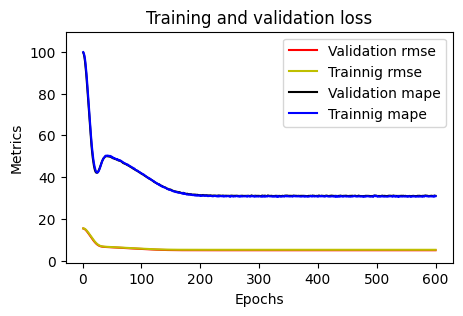

In [60]:
plotme(model2_1)

In [22]:
# inputs: distance + hour
model2_2 = nnmodel(10, num_hlayers=1,Epoch=500)
model2_2

Epoch 1/500
208/208 [==============================] - 0s 990us/step - loss: 861291.3750 - mape: 99.8929 - rmse: 928.0579 - val_loss: 854674.0625 - val_mape: 99.7796 - val_rmse: 924.4858
Epoch 2/500
208/208 [==============================] - 0s 724us/step - loss: 858031.6250 - mape: 99.5749 - rmse: 926.3000 - val_loss: 849970.3125 - val_mape: 99.3258 - val_rmse: 921.9384
Epoch 3/500
208/208 [==============================] - 0s 771us/step - loss: 851714.8750 - mape: 98.9635 - rmse: 922.8840 - val_loss: 842011.0625 - val_mape: 98.5617 - val_rmse: 917.6116
Epoch 4/500
208/208 [==============================] - 0s 725us/step - loss: 842085.0625 - mape: 98.0362 - rmse: 917.6519 - val_loss: 830631.1875 - val_mape: 97.4699 - val_rmse: 911.3897
Epoch 5/500
208/208 [==============================] - 0s 728us/step - loss: 829272.9375 - mape: 96.7931 - rmse: 910.6442 - val_loss: 816355.1875 - val_mape: 96.0907 - val_rmse: 903.5237
Epoch 6/500
208/208 [==============================] - 0s 776us/s

Epoch 45/500
208/208 [==============================] - 0s 724us/step - loss: 167577.0469 - mape: 47.7893 - rmse: 409.3618 - val_loss: 161765.2500 - val_mape: 47.8032 - val_rmse: 402.2005
Epoch 46/500
208/208 [==============================] - 0s 703us/step - loss: 165855.8750 - mape: 48.3234 - rmse: 407.2541 - val_loss: 160262.5312 - val_mape: 48.3266 - val_rmse: 400.3280
Epoch 47/500
208/208 [==============================] - 0s 784us/step - loss: 164416.0938 - mape: 48.8213 - rmse: 405.4825 - val_loss: 159002.0312 - val_mape: 48.7805 - val_rmse: 398.7506
Epoch 48/500
208/208 [==============================] - 0s 762us/step - loss: 163216.7344 - mape: 49.2686 - rmse: 404.0009 - val_loss: 157953.2500 - val_mape: 49.1469 - val_rmse: 397.4333
Epoch 49/500
208/208 [==============================] - 0s 726us/step - loss: 162195.3750 - mape: 49.5091 - rmse: 402.7349 - val_loss: 157046.1406 - val_mape: 49.4181 - val_rmse: 396.2905
Epoch 50/500
208/208 [==============================] - 0s 7

208/208 [==============================] - 0s 725us/step - loss: 120897.2734 - mape: 42.5577 - rmse: 347.7029 - val_loss: 115270.6016 - val_mape: 42.4296 - val_rmse: 339.5153
Epoch 132/500
208/208 [==============================] - 0s 750us/step - loss: 120431.1641 - mape: 42.4346 - rmse: 347.0319 - val_loss: 114791.3672 - val_mape: 42.3218 - val_rmse: 338.8087
Epoch 133/500
208/208 [==============================] - 0s 754us/step - loss: 119967.2500 - mape: 42.2635 - rmse: 346.3629 - val_loss: 114306.4922 - val_mape: 42.1584 - val_rmse: 338.0924
Epoch 134/500
208/208 [==============================] - 0s 742us/step - loss: 119514.2578 - mape: 42.1531 - rmse: 345.7083 - val_loss: 113832.5234 - val_mape: 42.0306 - val_rmse: 337.3907
Epoch 135/500
208/208 [==============================] - 0s 751us/step - loss: 119057.5547 - mape: 41.9579 - rmse: 345.0472 - val_loss: 113365.4922 - val_mape: 41.9068 - val_rmse: 336.6979
Epoch 136/500
208/208 [==============================] - 0s 773us/ste

Epoch 218/500
208/208 [==============================] - 0s 750us/step - loss: 98155.2578 - mape: 32.7594 - rmse: 313.2974 - val_loss: 90993.6328 - val_mape: 33.1331 - val_rmse: 301.6515
Epoch 219/500
208/208 [==============================] - 0s 747us/step - loss: 98091.3438 - mape: 32.8880 - rmse: 313.1954 - val_loss: 90924.1172 - val_mape: 33.1021 - val_rmse: 301.5363
Epoch 220/500
208/208 [==============================] - 0s 756us/step - loss: 98037.8594 - mape: 32.9194 - rmse: 313.1100 - val_loss: 90859.7109 - val_mape: 33.0733 - val_rmse: 301.4294
Epoch 221/500
208/208 [==============================] - 0s 709us/step - loss: 97992.0547 - mape: 32.8120 - rmse: 313.0368 - val_loss: 90777.3828 - val_mape: 32.9425 - val_rmse: 301.2928
Epoch 222/500
208/208 [==============================] - 0s 751us/step - loss: 97928.1172 - mape: 32.6962 - rmse: 312.9347 - val_loss: 90714.7656 - val_mape: 32.9072 - val_rmse: 301.1889
Epoch 223/500
208/208 [==============================] - 0s 727us

Epoch 262/500
208/208 [==============================] - 0s 753us/step - loss: 97083.4688 - mape: 31.2583 - rmse: 311.5822 - val_loss: 89534.6562 - val_mape: 31.5560 - val_rmse: 299.2234
Epoch 263/500
208/208 [==============================] - 0s 744us/step - loss: 97081.7500 - mape: 31.2927 - rmse: 311.5794 - val_loss: 89512.8828 - val_mape: 31.4787 - val_rmse: 299.1870
Epoch 264/500
208/208 [==============================] - 0s 727us/step - loss: 97071.9922 - mape: 31.2831 - rmse: 311.5638 - val_loss: 89513.8906 - val_mape: 31.5285 - val_rmse: 299.1887
Epoch 265/500
208/208 [==============================] - 0s 809us/step - loss: 97067.3203 - mape: 31.2593 - rmse: 311.5563 - val_loss: 89499.3516 - val_mape: 31.4811 - val_rmse: 299.1644
Epoch 266/500
208/208 [==============================] - 0s 758us/step - loss: 97062.5078 - mape: 31.2447 - rmse: 311.5486 - val_loss: 89481.7109 - val_mape: 31.4019 - val_rmse: 299.1349
Epoch 267/500
208/208 [==============================] - 0s 757us

Epoch 306/500
208/208 [==============================] - 0s 751us/step - loss: 96991.8125 - mape: 31.0660 - rmse: 311.4351 - val_loss: 89323.4844 - val_mape: 31.2218 - val_rmse: 298.8704
Epoch 307/500
208/208 [==============================] - 0s 762us/step - loss: 96990.1094 - mape: 30.9584 - rmse: 311.4323 - val_loss: 89306.9297 - val_mape: 31.1278 - val_rmse: 298.8427
Epoch 308/500
208/208 [==============================] - 0s 754us/step - loss: 96987.1484 - mape: 30.8849 - rmse: 311.4276 - val_loss: 89297.3438 - val_mape: 31.0807 - val_rmse: 298.8266
Epoch 309/500
208/208 [==============================] - 0s 748us/step - loss: 96987.3672 - mape: 30.8588 - rmse: 311.4279 - val_loss: 89306.3281 - val_mape: 31.1433 - val_rmse: 298.8416
Epoch 310/500
208/208 [==============================] - 0s 730us/step - loss: 96988.5938 - mape: 30.9803 - rmse: 311.4299 - val_loss: 89298.8516 - val_mape: 31.0863 - val_rmse: 298.8291
Epoch 311/500
208/208 [==============================] - 0s 749us

Epoch 350/500
208/208 [==============================] - 0s 747us/step - loss: 96979.8594 - mape: 30.8083 - rmse: 311.4159 - val_loss: 89281.1953 - val_mape: 31.1002 - val_rmse: 298.7996
Epoch 351/500
208/208 [==============================] - 0s 726us/step - loss: 96979.6172 - mape: 30.8196 - rmse: 311.4155 - val_loss: 89271.9531 - val_mape: 31.0538 - val_rmse: 298.7841
Epoch 352/500
208/208 [==============================] - 0s 746us/step - loss: 96979.0469 - mape: 30.7796 - rmse: 311.4146 - val_loss: 89259.8281 - val_mape: 30.9804 - val_rmse: 298.7638
Epoch 353/500
208/208 [==============================] - 0s 750us/step - loss: 96985.3203 - mape: 30.6535 - rmse: 311.4247 - val_loss: 89258.5859 - val_mape: 30.9871 - val_rmse: 298.7617
Epoch 354/500
208/208 [==============================] - 0s 726us/step - loss: 96980.2578 - mape: 30.7566 - rmse: 311.4165 - val_loss: 89272.3906 - val_mape: 31.0575 - val_rmse: 298.7849
Epoch 355/500
208/208 [==============================] - 0s 723us

Epoch 394/500
208/208 [==============================] - 0s 725us/step - loss: 96984.7422 - mape: 30.8333 - rmse: 311.4237 - val_loss: 89268.7734 - val_mape: 31.0658 - val_rmse: 298.7788
Epoch 395/500
208/208 [==============================] - 0s 771us/step - loss: 96982.5469 - mape: 30.8178 - rmse: 311.4202 - val_loss: 89252.2109 - val_mape: 30.9793 - val_rmse: 298.7511
Epoch 396/500
208/208 [==============================] - 0s 740us/step - loss: 96975.7812 - mape: 30.7281 - rmse: 311.4093 - val_loss: 89265.7031 - val_mape: 31.0494 - val_rmse: 298.7737
Epoch 397/500
208/208 [==============================] - 0s 753us/step - loss: 96985.2109 - mape: 30.7312 - rmse: 311.4245 - val_loss: 89266.1406 - val_mape: 31.0509 - val_rmse: 298.7744
Epoch 398/500
208/208 [==============================] - 0s 752us/step - loss: 96988.8750 - mape: 30.7864 - rmse: 311.4304 - val_loss: 89257.0156 - val_mape: 30.9886 - val_rmse: 298.7591
Epoch 399/500
208/208 [==============================] - 0s 740us

Epoch 438/500
208/208 [==============================] - 0s 771us/step - loss: 96989.1562 - mape: 30.7009 - rmse: 311.4308 - val_loss: 89255.4375 - val_mape: 30.9928 - val_rmse: 298.7565
Epoch 439/500
208/208 [==============================] - 0s 762us/step - loss: 96982.9531 - mape: 30.7207 - rmse: 311.4209 - val_loss: 89255.5391 - val_mape: 30.9867 - val_rmse: 298.7567
Epoch 440/500
208/208 [==============================] - 0s 742us/step - loss: 96987.9609 - mape: 30.8385 - rmse: 311.4289 - val_loss: 89244.4297 - val_mape: 30.9081 - val_rmse: 298.7381
Epoch 441/500
208/208 [==============================] - 0s 754us/step - loss: 96986.1875 - mape: 30.6137 - rmse: 311.4261 - val_loss: 89244.7344 - val_mape: 30.9204 - val_rmse: 298.7386
Epoch 442/500
208/208 [==============================] - 0s 773us/step - loss: 96981.2656 - mape: 30.7033 - rmse: 311.4182 - val_loss: 89249.2969 - val_mape: 30.9538 - val_rmse: 298.7462
Epoch 443/500
208/208 [==============================] - 0s 806us

Epoch 482/500
208/208 [==============================] - 0s 772us/step - loss: 96981.0078 - mape: 30.7641 - rmse: 311.4177 - val_loss: 89259.0781 - val_mape: 30.9816 - val_rmse: 298.7626
Epoch 483/500
208/208 [==============================] - 0s 749us/step - loss: 96977.2031 - mape: 30.8526 - rmse: 311.4116 - val_loss: 89266.8984 - val_mape: 31.0168 - val_rmse: 298.7757
Epoch 484/500
208/208 [==============================] - 0s 749us/step - loss: 96990.1094 - mape: 30.8060 - rmse: 311.4323 - val_loss: 89265.4844 - val_mape: 31.0037 - val_rmse: 298.7733
Epoch 485/500
208/208 [==============================] - 0s 763us/step - loss: 96984.6016 - mape: 30.7423 - rmse: 311.4235 - val_loss: 89262.0000 - val_mape: 30.9817 - val_rmse: 298.7675
Epoch 486/500
208/208 [==============================] - 0s 803us/step - loss: 96987.1172 - mape: 30.6689 - rmse: 311.4276 - val_loss: 89270.9531 - val_mape: 31.0405 - val_rmse: 298.7824
Epoch 487/500
208/208 [==============================] - 0s 744us

In [39]:
# plotme(model2_2)

In [23]:
# inputs: distance + hour
model2_3 = nnmodel(5, num_hlayers=1,Epoch=500)
model2_3

Epoch 1/500
208/208 [==============================] - 0s 1ms/step - loss: 861747.7500 - mape: 99.9364 - rmse: 928.3037 - val_loss: 855258.5625 - val_mape: 99.8393 - val_rmse: 924.8019
Epoch 2/500
208/208 [==============================] - 0s 780us/step - loss: 859457.8125 - mape: 99.7187 - rmse: 927.0695 - val_loss: 852479.8750 - val_mape: 99.5755 - val_rmse: 923.2983
Epoch 3/500
208/208 [==============================] - 0s 724us/step - loss: 856169.6250 - mape: 99.4018 - rmse: 925.2944 - val_loss: 848580.7500 - val_mape: 99.2051 - val_rmse: 921.1844
Epoch 4/500
208/208 [==============================] - 0s 748us/step - loss: 851724.3750 - mape: 98.9760 - rmse: 922.8892 - val_loss: 843479.3125 - val_mape: 98.7195 - val_rmse: 918.4113
Epoch 5/500
208/208 [==============================] - 0s 726us/step - loss: 846116.8125 - mape: 98.4356 - rmse: 919.8461 - val_loss: 837252.5625 - val_mape: 98.1247 - val_rmse: 915.0151
Epoch 6/500
208/208 [==============================] - 0s 724us/ste

Epoch 45/500
208/208 [==============================] - 0s 705us/step - loss: 344598.2812 - mape: 48.3014 - rmse: 587.0250 - val_loss: 331949.4062 - val_mape: 47.5252 - val_rmse: 576.1505
Epoch 46/500
208/208 [==============================] - 0s 722us/step - loss: 333852.9375 - mape: 47.6034 - rmse: 577.8001 - val_loss: 321421.1562 - val_mape: 46.8270 - val_rmse: 566.9402
Epoch 47/500
208/208 [==============================] - 0s 774us/step - loss: 323330.9062 - mape: 46.9383 - rmse: 568.6219 - val_loss: 311193.6562 - val_mape: 46.1998 - val_rmse: 557.8474
Epoch 48/500
208/208 [==============================] - 0s 773us/step - loss: 313136.2500 - mape: 46.3239 - rmse: 559.5858 - val_loss: 301204.4062 - val_mape: 45.5975 - val_rmse: 548.8209
Epoch 49/500
208/208 [==============================] - 0s 764us/step - loss: 303200.9688 - mape: 45.7764 - rmse: 550.6369 - val_loss: 291511.8438 - val_mape: 45.0504 - val_rmse: 539.9184
Epoch 50/500
208/208 [==============================] - 0s 7

208/208 [==============================] - 0s 726us/step - loss: 145958.6094 - mape: 48.4004 - rmse: 382.0453 - val_loss: 141163.4688 - val_mape: 48.2537 - val_rmse: 375.7173
Epoch 132/500
208/208 [==============================] - 0s 724us/step - loss: 145646.7656 - mape: 48.4573 - rmse: 381.6370 - val_loss: 140849.5781 - val_mape: 48.1982 - val_rmse: 375.2993
Epoch 133/500
208/208 [==============================] - 0s 724us/step - loss: 145337.5625 - mape: 48.3081 - rmse: 381.2316 - val_loss: 140530.9844 - val_mape: 48.1141 - val_rmse: 374.8746
Epoch 134/500
208/208 [==============================] - 0s 805us/step - loss: 145031.9219 - mape: 48.3774 - rmse: 380.8306 - val_loss: 140209.2656 - val_mape: 48.0585 - val_rmse: 374.4453
Epoch 135/500
208/208 [==============================] - 0s 742us/step - loss: 144716.7031 - mape: 48.1701 - rmse: 380.4165 - val_loss: 139885.8438 - val_mape: 47.9228 - val_rmse: 374.0132
Epoch 136/500
208/208 [==============================] - 0s 776us/ste

208/208 [==============================] - 0s 773us/step - loss: 120070.6094 - mape: 42.3314 - rmse: 346.5121 - val_loss: 114507.4844 - val_mape: 42.2101 - val_rmse: 338.3896
Epoch 218/500
208/208 [==============================] - 0s 668us/step - loss: 119788.7344 - mape: 42.2062 - rmse: 346.1051 - val_loss: 114214.9531 - val_mape: 42.1406 - val_rmse: 337.9570
Epoch 219/500
208/208 [==============================] - 0s 773us/step - loss: 119511.3281 - mape: 42.2676 - rmse: 345.7041 - val_loss: 113928.2656 - val_mape: 42.1070 - val_rmse: 337.5326
Epoch 220/500
208/208 [==============================] - 0s 715us/step - loss: 119234.1953 - mape: 42.1851 - rmse: 345.3030 - val_loss: 113642.9531 - val_mape: 42.0686 - val_rmse: 337.1097
Epoch 221/500
208/208 [==============================] - 0s 689us/step - loss: 118953.0078 - mape: 42.0713 - rmse: 344.8957 - val_loss: 113351.3516 - val_mape: 41.9371 - val_rmse: 336.6769
Epoch 222/500
208/208 [==============================] - 0s 724us/ste

208/208 [==============================] - 0s 751us/step - loss: 102063.6328 - mape: 35.6184 - rmse: 319.4740 - val_loss: 95480.8047 - val_mape: 35.7543 - val_rmse: 308.9997
Epoch 304/500
208/208 [==============================] - 0s 747us/step - loss: 101951.5078 - mape: 35.5943 - rmse: 319.2985 - val_loss: 95356.9219 - val_mape: 35.7171 - val_rmse: 308.7992
Epoch 305/500
208/208 [==============================] - 0s 725us/step - loss: 101837.5312 - mape: 35.4857 - rmse: 319.1199 - val_loss: 95225.6484 - val_mape: 35.6329 - val_rmse: 308.5865
Epoch 306/500
208/208 [==============================] - 0s 774us/step - loss: 101721.1562 - mape: 35.4401 - rmse: 318.9375 - val_loss: 95100.9062 - val_mape: 35.5761 - val_rmse: 308.3843
Epoch 307/500
208/208 [==============================] - 0s 784us/step - loss: 101610.6953 - mape: 35.4800 - rmse: 318.7643 - val_loss: 94982.2188 - val_mape: 35.5260 - val_rmse: 308.1919
Epoch 308/500
208/208 [==============================] - 0s 713us/step - l

Epoch 347/500
208/208 [==============================] - 0s 711us/step - loss: 98548.0469 - mape: 33.3706 - rmse: 313.9236 - val_loss: 91507.7656 - val_mape: 33.5776 - val_rmse: 302.5025
Epoch 348/500
208/208 [==============================] - 0s 701us/step - loss: 98501.8750 - mape: 33.3009 - rmse: 313.8501 - val_loss: 91447.1250 - val_mape: 33.4858 - val_rmse: 302.4023
Epoch 349/500
208/208 [==============================] - 0s 675us/step - loss: 98461.0000 - mape: 33.2019 - rmse: 313.7850 - val_loss: 91393.2969 - val_mape: 33.4181 - val_rmse: 302.3132
Epoch 350/500
208/208 [==============================] - 0s 726us/step - loss: 98421.9609 - mape: 33.1048 - rmse: 313.7227 - val_loss: 91344.2344 - val_mape: 33.3811 - val_rmse: 302.2321
Epoch 351/500
208/208 [==============================] - 0s 725us/step - loss: 98378.2188 - mape: 33.1750 - rmse: 313.6530 - val_loss: 91295.0078 - val_mape: 33.3496 - val_rmse: 302.1506
Epoch 352/500
208/208 [==============================] - 0s 727us

Epoch 391/500
208/208 [==============================] - 0s 749us/step - loss: 97357.8594 - mape: 31.9704 - rmse: 312.0222 - val_loss: 89980.4531 - val_mape: 32.1644 - val_rmse: 299.9674
Epoch 392/500
208/208 [==============================] - 0s 716us/step - loss: 97342.1328 - mape: 31.9378 - rmse: 311.9970 - val_loss: 89960.7578 - val_mape: 32.1446 - val_rmse: 299.9346
Epoch 393/500
208/208 [==============================] - 0s 685us/step - loss: 97333.5156 - mape: 31.9059 - rmse: 311.9832 - val_loss: 89946.3984 - val_mape: 32.1497 - val_rmse: 299.9106
Epoch 394/500
208/208 [==============================] - 0s 726us/step - loss: 97321.8750 - mape: 31.9658 - rmse: 311.9645 - val_loss: 89924.9375 - val_mape: 32.1075 - val_rmse: 299.8749
Epoch 395/500
208/208 [==============================] - 0s 749us/step - loss: 97306.3125 - mape: 31.8823 - rmse: 311.9396 - val_loss: 89906.9609 - val_mape: 32.0845 - val_rmse: 299.8449
Epoch 396/500
208/208 [==============================] - 0s 728us

Epoch 435/500
208/208 [==============================] - 0s 702us/step - loss: 97055.7031 - mape: 31.2586 - rmse: 311.5376 - val_loss: 89500.1016 - val_mape: 31.5223 - val_rmse: 299.1657
Epoch 436/500
208/208 [==============================] - 0s 724us/step - loss: 97054.8906 - mape: 31.2279 - rmse: 311.5363 - val_loss: 89495.8125 - val_mape: 31.5326 - val_rmse: 299.1585
Epoch 437/500
208/208 [==============================] - 0s 757us/step - loss: 97052.4375 - mape: 31.2407 - rmse: 311.5324 - val_loss: 89494.3281 - val_mape: 31.5438 - val_rmse: 299.1560
Epoch 438/500
208/208 [==============================] - 0s 716us/step - loss: 97050.5625 - mape: 31.3391 - rmse: 311.5294 - val_loss: 89493.2422 - val_mape: 31.5679 - val_rmse: 299.1542
Epoch 439/500
208/208 [==============================] - 0s 699us/step - loss: 97049.5781 - mape: 31.2979 - rmse: 311.5278 - val_loss: 89481.9141 - val_mape: 31.5251 - val_rmse: 299.1353
Epoch 440/500
208/208 [==============================] - 0s 701us

Epoch 479/500
208/208 [==============================] - 0s 724us/step - loss: 96991.3281 - mape: 30.9540 - rmse: 311.4343 - val_loss: 89339.2578 - val_mape: 31.1778 - val_rmse: 298.8967
Epoch 480/500
208/208 [==============================] - 0s 707us/step - loss: 96992.3203 - mape: 31.0210 - rmse: 311.4359 - val_loss: 89346.9375 - val_mape: 31.2503 - val_rmse: 298.9096
Epoch 481/500
208/208 [==============================] - 0s 726us/step - loss: 96988.3516 - mape: 30.9549 - rmse: 311.4295 - val_loss: 89341.3672 - val_mape: 31.2238 - val_rmse: 298.9003
Epoch 482/500
208/208 [==============================] - 0s 660us/step - loss: 96989.9453 - mape: 31.0120 - rmse: 311.4321 - val_loss: 89342.9844 - val_mape: 31.2470 - val_rmse: 298.9030
Epoch 483/500
208/208 [==============================] - 0s 723us/step - loss: 96987.1641 - mape: 30.9643 - rmse: 311.4276 - val_loss: 89336.3516 - val_mape: 31.2183 - val_rmse: 298.8919
Epoch 484/500
208/208 [==============================] - 0s 725us

In [24]:
# inputs: distance + hour
model2_4 = nnmodel(10,5, num_hlayers=2,Epoch=500)
model2_4

Epoch 1/500
208/208 [==============================] - 0s 1ms/step - loss: 862050.3125 - mape: 99.9672 - rmse: 928.4667 - val_loss: 855754.5625 - val_mape: 99.8856 - val_rmse: 925.0700
Epoch 2/500
208/208 [==============================] - 0s 774us/step - loss: 858654.0000 - mape: 99.6347 - rmse: 926.6359 - val_loss: 849031.8750 - val_mape: 99.2369 - val_rmse: 921.4293
Epoch 3/500
208/208 [==============================] - 0s 773us/step - loss: 846029.6250 - mape: 98.4264 - rmse: 919.7987 - val_loss: 829039.8750 - val_mape: 97.3071 - val_rmse: 910.5163
Epoch 4/500
208/208 [==============================] - 0s 772us/step - loss: 816789.3125 - mape: 95.5474 - rmse: 903.7640 - val_loss: 789566.1250 - val_mape: 93.4260 - val_rmse: 888.5753
Epoch 5/500
208/208 [==============================] - 0s 794us/step - loss: 767395.7500 - mape: 90.5247 - rmse: 876.0113 - val_loss: 729529.3750 - val_mape: 87.2818 - val_rmse: 854.1249
Epoch 6/500
208/208 [==============================] - 0s 752us/ste

Epoch 45/500
208/208 [==============================] - 0s 773us/step - loss: 130478.1953 - mape: 45.4453 - rmse: 361.2177 - val_loss: 124775.4531 - val_mape: 45.2172 - val_rmse: 353.2357
Epoch 46/500
208/208 [==============================] - 0s 724us/step - loss: 129206.5547 - mape: 44.9002 - rmse: 359.4531 - val_loss: 123479.9922 - val_mape: 44.9788 - val_rmse: 351.3972
Epoch 47/500
208/208 [==============================] - 0s 821us/step - loss: 127942.5781 - mape: 44.7697 - rmse: 357.6906 - val_loss: 122168.0312 - val_mape: 44.5473 - val_rmse: 349.5255
Epoch 48/500
208/208 [==============================] - 0s 773us/step - loss: 126656.2734 - mape: 44.4938 - rmse: 355.8880 - val_loss: 120851.6016 - val_mape: 44.0760 - val_rmse: 347.6372
Epoch 49/500
208/208 [==============================] - 0s 773us/step - loss: 125408.2500 - mape: 44.1284 - rmse: 354.1303 - val_loss: 119551.3828 - val_mape: 43.6849 - val_rmse: 345.7620
Epoch 50/500
208/208 [==============================] - 0s 7

Epoch 89/500
208/208 [==============================] - 0s 774us/step - loss: 97368.1719 - mape: 32.8072 - rmse: 312.0387 - val_loss: 90178.6250 - val_mape: 33.1671 - val_rmse: 300.2975
Epoch 90/500
208/208 [==============================] - 0s 771us/step - loss: 97251.3828 - mape: 33.0188 - rmse: 311.8515 - val_loss: 89999.3906 - val_mape: 32.7875 - val_rmse: 299.9990
Epoch 91/500
208/208 [==============================] - 0s 782us/step - loss: 97142.7969 - mape: 32.6612 - rmse: 311.6774 - val_loss: 89896.0469 - val_mape: 32.8657 - val_rmse: 299.8267
Epoch 92/500
208/208 [==============================] - 0s 802us/step - loss: 97031.9219 - mape: 32.7184 - rmse: 311.4995 - val_loss: 89751.5859 - val_mape: 32.4928 - val_rmse: 299.5857
Epoch 93/500
208/208 [==============================] - 0s 774us/step - loss: 96963.1875 - mape: 32.3439 - rmse: 311.3891 - val_loss: 89716.6172 - val_mape: 32.8407 - val_rmse: 299.5273
Epoch 94/500
208/208 [==============================] - 0s 774us/step 

Epoch 133/500
208/208 [==============================] - 0s 844us/step - loss: 96435.9375 - mape: 31.3714 - rmse: 310.5414 - val_loss: 88863.3047 - val_mape: 31.2465 - val_rmse: 298.0995
Epoch 134/500
208/208 [==============================] - 0s 768us/step - loss: 96416.2188 - mape: 31.1263 - rmse: 310.5096 - val_loss: 88910.8203 - val_mape: 31.5261 - val_rmse: 298.1792
Epoch 135/500
208/208 [==============================] - 0s 748us/step - loss: 96416.6484 - mape: 31.1875 - rmse: 310.5103 - val_loss: 88911.3516 - val_mape: 31.5374 - val_rmse: 298.1801
Epoch 136/500
208/208 [==============================] - 0s 771us/step - loss: 96432.6484 - mape: 31.6087 - rmse: 310.5361 - val_loss: 88854.2500 - val_mape: 31.1544 - val_rmse: 298.0843
Epoch 137/500
208/208 [==============================] - 0s 773us/step - loss: 96408.7422 - mape: 31.1486 - rmse: 310.4976 - val_loss: 88861.5391 - val_mape: 31.2761 - val_rmse: 298.0965
Epoch 138/500
208/208 [==============================] - 0s 773us

Epoch 177/500
208/208 [==============================] - 0s 772us/step - loss: 96384.6172 - mape: 31.1336 - rmse: 310.4587 - val_loss: 88858.8984 - val_mape: 31.3635 - val_rmse: 298.0921
Epoch 178/500
208/208 [==============================] - 0s 788us/step - loss: 96399.9219 - mape: 31.4095 - rmse: 310.4834 - val_loss: 88887.2812 - val_mape: 31.4542 - val_rmse: 298.1397
Epoch 179/500
208/208 [==============================] - 0s 808us/step - loss: 96389.3594 - mape: 31.3121 - rmse: 310.4664 - val_loss: 88832.5859 - val_mape: 31.1574 - val_rmse: 298.0480
Epoch 180/500
208/208 [==============================] - 0s 774us/step - loss: 96378.8125 - mape: 31.1598 - rmse: 310.4494 - val_loss: 88833.4766 - val_mape: 31.2042 - val_rmse: 298.0494
Epoch 181/500
208/208 [==============================] - 0s 782us/step - loss: 96384.3359 - mape: 31.1950 - rmse: 310.4583 - val_loss: 88858.1016 - val_mape: 31.3578 - val_rmse: 298.0908
Epoch 182/500
208/208 [==============================] - 0s 753us

Epoch 221/500
208/208 [==============================] - 0s 821us/step - loss: 96378.9844 - mape: 31.5597 - rmse: 310.4496 - val_loss: 88837.5938 - val_mape: 31.1563 - val_rmse: 298.0564
Epoch 222/500
208/208 [==============================] - 0s 774us/step - loss: 96371.7109 - mape: 31.2528 - rmse: 310.4379 - val_loss: 88836.8750 - val_mape: 31.1676 - val_rmse: 298.0551
Epoch 223/500
208/208 [==============================] - 0s 774us/step - loss: 96373.8984 - mape: 31.1348 - rmse: 310.4415 - val_loss: 88844.1250 - val_mape: 31.2535 - val_rmse: 298.0673
Epoch 224/500
208/208 [==============================] - 0s 821us/step - loss: 96380.4062 - mape: 31.2534 - rmse: 310.4519 - val_loss: 88863.4297 - val_mape: 31.3617 - val_rmse: 298.0997
Epoch 225/500
208/208 [==============================] - 0s 772us/step - loss: 96400.8125 - mape: 31.4794 - rmse: 310.4848 - val_loss: 88855.2422 - val_mape: 31.3051 - val_rmse: 298.0860
Epoch 226/500
208/208 [==============================] - 0s 749us

Epoch 265/500
208/208 [==============================] - 0s 748us/step - loss: 96381.9297 - mape: 31.1812 - rmse: 310.4544 - val_loss: 88824.2266 - val_mape: 31.1923 - val_rmse: 298.0339
Epoch 266/500
208/208 [==============================] - 0s 725us/step - loss: 96361.4688 - mape: 31.2943 - rmse: 310.4214 - val_loss: 88816.7500 - val_mape: 31.1221 - val_rmse: 298.0214
Epoch 267/500
208/208 [==============================] - 0s 749us/step - loss: 96356.5078 - mape: 31.1387 - rmse: 310.4135 - val_loss: 88823.4531 - val_mape: 31.2155 - val_rmse: 298.0326
Epoch 268/500
208/208 [==============================] - 0s 749us/step - loss: 96363.0938 - mape: 31.0873 - rmse: 310.4240 - val_loss: 88848.0156 - val_mape: 31.3747 - val_rmse: 298.0739
Epoch 269/500
208/208 [==============================] - 0s 774us/step - loss: 96351.8828 - mape: 31.3831 - rmse: 310.4060 - val_loss: 88818.5703 - val_mape: 31.1390 - val_rmse: 298.0244
Epoch 270/500
208/208 [==============================] - 0s 723us

Epoch 309/500
208/208 [==============================] - 0s 727us/step - loss: 96320.6797 - mape: 31.6216 - rmse: 310.3557 - val_loss: 88848.2422 - val_mape: 31.1964 - val_rmse: 298.0742
Epoch 310/500
208/208 [==============================] - 0s 772us/step - loss: 96346.5625 - mape: 31.4744 - rmse: 310.3974 - val_loss: 88843.2266 - val_mape: 31.2463 - val_rmse: 298.0658
Epoch 311/500
208/208 [==============================] - 0s 774us/step - loss: 96348.7500 - mape: 31.2365 - rmse: 310.4009 - val_loss: 88832.6250 - val_mape: 31.1951 - val_rmse: 298.0480
Epoch 312/500
208/208 [==============================] - 0s 778us/step - loss: 96377.9062 - mape: 30.9791 - rmse: 310.4479 - val_loss: 88843.2031 - val_mape: 31.2506 - val_rmse: 298.0658
Epoch 313/500
208/208 [==============================] - 0s 767us/step - loss: 96363.2500 - mape: 31.2850 - rmse: 310.4243 - val_loss: 88834.8359 - val_mape: 31.1752 - val_rmse: 298.0517
Epoch 314/500
208/208 [==============================] - 0s 790us

Epoch 353/500
208/208 [==============================] - 0s 767us/step - loss: 96335.6016 - mape: 31.3329 - rmse: 310.3798 - val_loss: 88807.7891 - val_mape: 31.1852 - val_rmse: 298.0063
Epoch 354/500
208/208 [==============================] - 0s 749us/step - loss: 96324.6953 - mape: 31.0293 - rmse: 310.3622 - val_loss: 88869.2344 - val_mape: 31.5415 - val_rmse: 298.1094
Epoch 355/500
208/208 [==============================] - 0s 768us/step - loss: 96338.0469 - mape: 31.2732 - rmse: 310.3837 - val_loss: 88839.0703 - val_mape: 31.4215 - val_rmse: 298.0588
Epoch 356/500
208/208 [==============================] - 0s 750us/step - loss: 96318.9688 - mape: 31.2124 - rmse: 310.3530 - val_loss: 88812.9688 - val_mape: 31.2470 - val_rmse: 298.0150
Epoch 357/500
208/208 [==============================] - 0s 770us/step - loss: 96321.8828 - mape: 31.5189 - rmse: 310.3577 - val_loss: 88803.8516 - val_mape: 30.9469 - val_rmse: 297.9998
Epoch 358/500
208/208 [==============================] - 0s 746us

Epoch 397/500
208/208 [==============================] - 0s 774us/step - loss: 96299.8672 - mape: 31.2407 - rmse: 310.3222 - val_loss: 88810.0391 - val_mape: 31.3184 - val_rmse: 298.0101
Epoch 398/500
208/208 [==============================] - 0s 772us/step - loss: 96323.5781 - mape: 31.3208 - rmse: 310.3604 - val_loss: 88851.0000 - val_mape: 31.5197 - val_rmse: 298.0789
Epoch 399/500
208/208 [==============================] - 0s 772us/step - loss: 96321.6406 - mape: 31.2414 - rmse: 310.3573 - val_loss: 88809.9766 - val_mape: 31.3029 - val_rmse: 298.0100
Epoch 400/500
208/208 [==============================] - 0s 773us/step - loss: 96311.8828 - mape: 31.2622 - rmse: 310.3416 - val_loss: 88813.7188 - val_mape: 31.3498 - val_rmse: 298.0163
Epoch 401/500
208/208 [==============================] - 0s 803us/step - loss: 96313.8438 - mape: 31.2428 - rmse: 310.3447 - val_loss: 88807.6406 - val_mape: 31.2997 - val_rmse: 298.0061
Epoch 402/500
208/208 [==============================] - 0s 774us

Epoch 441/500
208/208 [==============================] - 0s 824us/step - loss: 96308.0781 - mape: 31.2083 - rmse: 310.3354 - val_loss: 88801.9375 - val_mape: 31.3198 - val_rmse: 297.9966
Epoch 442/500
208/208 [==============================] - 0s 822us/step - loss: 96310.3906 - mape: 31.2778 - rmse: 310.3391 - val_loss: 88802.6328 - val_mape: 31.3065 - val_rmse: 297.9977
Epoch 443/500
208/208 [==============================] - 0s 772us/step - loss: 96294.7969 - mape: 31.2428 - rmse: 310.3140 - val_loss: 88799.8047 - val_mape: 31.2804 - val_rmse: 297.9930
Epoch 444/500
208/208 [==============================] - 0s 773us/step - loss: 96297.9609 - mape: 31.1485 - rmse: 310.3191 - val_loss: 88815.2188 - val_mape: 31.4030 - val_rmse: 298.0188
Epoch 445/500
208/208 [==============================] - 0s 822us/step - loss: 96314.0312 - mape: 31.2604 - rmse: 310.3450 - val_loss: 88818.2578 - val_mape: 31.4086 - val_rmse: 298.0239
Epoch 446/500
208/208 [==============================] - 0s 779us

Epoch 485/500
208/208 [==============================] - 0s 802us/step - loss: 96282.1484 - mape: 31.2462 - rmse: 310.2936 - val_loss: 88781.4219 - val_mape: 31.2593 - val_rmse: 297.9621
Epoch 486/500
208/208 [==============================] - 0s 750us/step - loss: 96293.3828 - mape: 31.1474 - rmse: 310.3117 - val_loss: 88800.8672 - val_mape: 31.3761 - val_rmse: 297.9948
Epoch 487/500
208/208 [==============================] - 0s 796us/step - loss: 96309.4141 - mape: 31.5578 - rmse: 310.3376 - val_loss: 88805.9844 - val_mape: 31.3152 - val_rmse: 298.0033
Epoch 488/500
208/208 [==============================] - 0s 748us/step - loss: 96272.8516 - mape: 31.1976 - rmse: 310.2787 - val_loss: 88830.0234 - val_mape: 31.4986 - val_rmse: 298.0437
Epoch 489/500
208/208 [==============================] - 0s 773us/step - loss: 96289.4531 - mape: 31.3707 - rmse: 310.3054 - val_loss: 88798.9922 - val_mape: 31.3260 - val_rmse: 297.9916
Epoch 490/500
208/208 [==============================] - 0s 772us

In [25]:
# inputs: distance + hour
model2_5 = nnmodel(20,10, num_hlayers=2,Epoch=500)
model2_5

Epoch 1/500
208/208 [==============================] - 0s 1ms/step - loss: 855098.4375 - mape: 99.2945 - rmse: 924.7153 - val_loss: 833128.4375 - val_mape: 97.6978 - val_rmse: 912.7587
Epoch 2/500
208/208 [==============================] - 0s 758us/step - loss: 785132.1250 - mape: 92.3136 - rmse: 886.0768 - val_loss: 698949.5000 - val_mape: 83.9891 - val_rmse: 836.0320
Epoch 3/500
208/208 [==============================] - 0s 777us/step - loss: 585785.8125 - mape: 70.7125 - rmse: 765.3665 - val_loss: 446715.8750 - val_mape: 55.8736 - val_rmse: 668.3680
Epoch 4/500
208/208 [==============================] - 0s 768us/step - loss: 339920.9688 - mape: 45.7038 - rmse: 583.0274 - val_loss: 241381.9219 - val_mape: 40.3210 - val_rmse: 491.3063
Epoch 5/500
208/208 [==============================] - 0s 802us/step - loss: 206040.8594 - mape: 42.8609 - rmse: 453.9172 - val_loss: 173481.5938 - val_mape: 44.8649 - val_rmse: 416.5112
Epoch 6/500
208/208 [==============================] - 0s 748us/ste

Epoch 45/500
208/208 [==============================] - 0s 772us/step - loss: 96524.2422 - mape: 31.8357 - rmse: 310.6835 - val_loss: 89158.4297 - val_mape: 31.4068 - val_rmse: 298.5941
Epoch 46/500
208/208 [==============================] - 0s 774us/step - loss: 96541.9531 - mape: 31.3678 - rmse: 310.7120 - val_loss: 89141.1719 - val_mape: 31.5861 - val_rmse: 298.5652
Epoch 47/500
208/208 [==============================] - 0s 773us/step - loss: 96542.7031 - mape: 31.4949 - rmse: 310.7132 - val_loss: 89108.0547 - val_mape: 31.5222 - val_rmse: 298.5097
Epoch 48/500
208/208 [==============================] - 0s 772us/step - loss: 96437.4297 - mape: 31.4434 - rmse: 310.5438 - val_loss: 89089.4062 - val_mape: 30.9711 - val_rmse: 298.4785
Epoch 49/500
208/208 [==============================] - 0s 774us/step - loss: 96468.2734 - mape: 31.2063 - rmse: 310.5934 - val_loss: 89068.2812 - val_mape: 31.5528 - val_rmse: 298.4431
Epoch 50/500
208/208 [==============================] - 0s 772us/step 

208/208 [==============================] - 0s 774us/step - loss: 96298.0547 - mape: 31.6010 - rmse: 310.3193 - val_loss: 88961.0391 - val_mape: 31.3796 - val_rmse: 298.2634
Epoch 90/500
208/208 [==============================] - 0s 749us/step - loss: 96313.8750 - mape: 31.2147 - rmse: 310.3448 - val_loss: 88972.2656 - val_mape: 31.5219 - val_rmse: 298.2822
Epoch 91/500
208/208 [==============================] - 0s 738us/step - loss: 96314.8672 - mape: 31.3394 - rmse: 310.3464 - val_loss: 88970.2656 - val_mape: 31.5940 - val_rmse: 298.2788
Epoch 92/500
208/208 [==============================] - 0s 725us/step - loss: 96310.5703 - mape: 31.4055 - rmse: 310.3394 - val_loss: 88939.6250 - val_mape: 31.0224 - val_rmse: 298.2275
Epoch 93/500
208/208 [==============================] - 0s 748us/step - loss: 96295.7031 - mape: 31.0691 - rmse: 310.3155 - val_loss: 89006.4375 - val_mape: 31.7930 - val_rmse: 298.3395
Epoch 94/500
208/208 [==============================] - 0s 731us/step - loss: 96283

Epoch 133/500
208/208 [==============================] - 0s 774us/step - loss: 96246.8125 - mape: 31.1225 - rmse: 310.2367 - val_loss: 88989.7188 - val_mape: 31.8671 - val_rmse: 298.3114
Epoch 134/500
208/208 [==============================] - 0s 772us/step - loss: 96254.9531 - mape: 31.6124 - rmse: 310.2498 - val_loss: 88869.0703 - val_mape: 31.1823 - val_rmse: 298.1092
Epoch 135/500
208/208 [==============================] - 0s 773us/step - loss: 96284.6719 - mape: 31.2798 - rmse: 310.2977 - val_loss: 88875.5547 - val_mape: 31.0152 - val_rmse: 298.1200
Epoch 136/500
208/208 [==============================] - 0s 773us/step - loss: 96212.5391 - mape: 30.9144 - rmse: 310.1815 - val_loss: 89166.3750 - val_mape: 32.3198 - val_rmse: 298.6074
Epoch 137/500
208/208 [==============================] - 0s 773us/step - loss: 96342.1719 - mape: 31.6996 - rmse: 310.3904 - val_loss: 88876.3203 - val_mape: 31.3002 - val_rmse: 298.1213
Epoch 138/500
208/208 [==============================] - 0s 796us

Epoch 177/500
208/208 [==============================] - 0s 773us/step - loss: 96228.8750 - mape: 31.2621 - rmse: 310.2078 - val_loss: 88890.2344 - val_mape: 31.5003 - val_rmse: 298.1447
Epoch 178/500
208/208 [==============================] - 0s 797us/step - loss: 96232.6719 - mape: 31.1726 - rmse: 310.2139 - val_loss: 88849.1094 - val_mape: 31.4078 - val_rmse: 298.0757
Epoch 179/500
208/208 [==============================] - 0s 783us/step - loss: 96216.4922 - mape: 31.1323 - rmse: 310.1878 - val_loss: 88859.8203 - val_mape: 31.2475 - val_rmse: 298.0937
Epoch 180/500
208/208 [==============================] - 0s 766us/step - loss: 96257.0938 - mape: 31.3807 - rmse: 310.2533 - val_loss: 88887.7344 - val_mape: 31.6183 - val_rmse: 298.1405
Epoch 181/500
208/208 [==============================] - 0s 800us/step - loss: 96273.5312 - mape: 31.1217 - rmse: 310.2798 - val_loss: 88909.4609 - val_mape: 31.7073 - val_rmse: 298.1769
Epoch 182/500
208/208 [==============================] - 0s 774us

Epoch 221/500
208/208 [==============================] - 0s 774us/step - loss: 96414.9688 - mape: 31.8129 - rmse: 310.5076 - val_loss: 88932.1406 - val_mape: 31.7940 - val_rmse: 298.2149
Epoch 222/500
208/208 [==============================] - 0s 780us/step - loss: 96224.4766 - mape: 31.5980 - rmse: 310.2007 - val_loss: 88877.6016 - val_mape: 31.5362 - val_rmse: 298.1235
Epoch 223/500
208/208 [==============================] - 0s 765us/step - loss: 96242.9688 - mape: 31.2444 - rmse: 310.2305 - val_loss: 88939.7422 - val_mape: 31.8731 - val_rmse: 298.2277
Epoch 224/500
208/208 [==============================] - 0s 772us/step - loss: 96215.5547 - mape: 31.3588 - rmse: 310.1863 - val_loss: 88888.6641 - val_mape: 31.6701 - val_rmse: 298.1420
Epoch 225/500
208/208 [==============================] - 0s 725us/step - loss: 96233.1953 - mape: 31.2645 - rmse: 310.2148 - val_loss: 88845.9688 - val_mape: 31.3487 - val_rmse: 298.0704
Epoch 226/500
208/208 [==============================] - 0s 773us

Epoch 265/500
208/208 [==============================] - 0s 845us/step - loss: 96228.0703 - mape: 31.3630 - rmse: 310.2065 - val_loss: 88839.9375 - val_mape: 31.1708 - val_rmse: 298.0603
Epoch 266/500
208/208 [==============================] - 0s 760us/step - loss: 96239.8203 - mape: 31.2366 - rmse: 310.2254 - val_loss: 88838.2188 - val_mape: 31.4033 - val_rmse: 298.0574
Epoch 267/500
208/208 [==============================] - 0s 781us/step - loss: 96223.5312 - mape: 31.3506 - rmse: 310.1992 - val_loss: 88824.9922 - val_mape: 31.0496 - val_rmse: 298.0352
Epoch 268/500
208/208 [==============================] - 0s 812us/step - loss: 96256.1797 - mape: 31.1291 - rmse: 310.2518 - val_loss: 88884.7188 - val_mape: 31.7111 - val_rmse: 298.1354
Epoch 269/500
208/208 [==============================] - 0s 757us/step - loss: 96235.5312 - mape: 31.0742 - rmse: 310.2185 - val_loss: 88866.8750 - val_mape: 31.6498 - val_rmse: 298.1055
Epoch 270/500
208/208 [==============================] - 0s 791us

Epoch 309/500
208/208 [==============================] - 0s 758us/step - loss: 96203.0000 - mape: 31.2941 - rmse: 310.1661 - val_loss: 88866.7500 - val_mape: 31.5697 - val_rmse: 298.1053
Epoch 310/500
208/208 [==============================] - 0s 723us/step - loss: 96243.2109 - mape: 31.2418 - rmse: 310.2309 - val_loss: 88828.1016 - val_mape: 31.3176 - val_rmse: 298.0404
Epoch 311/500
208/208 [==============================] - 0s 798us/step - loss: 96208.9531 - mape: 31.2258 - rmse: 310.1757 - val_loss: 88865.5938 - val_mape: 31.6381 - val_rmse: 298.1033
Epoch 312/500
208/208 [==============================] - 0s 796us/step - loss: 96220.5859 - mape: 31.4520 - rmse: 310.1944 - val_loss: 88846.0078 - val_mape: 31.5129 - val_rmse: 298.0705
Epoch 313/500
208/208 [==============================] - 0s 774us/step - loss: 96225.2422 - mape: 31.1780 - rmse: 310.2019 - val_loss: 88865.7344 - val_mape: 31.6660 - val_rmse: 298.1036
Epoch 314/500
208/208 [==============================] - 0s 779us

Epoch 353/500
208/208 [==============================] - 0s 764us/step - loss: 96196.1719 - mape: 31.2859 - rmse: 310.1551 - val_loss: 88841.7266 - val_mape: 31.4309 - val_rmse: 298.0633
Epoch 354/500
208/208 [==============================] - 0s 772us/step - loss: 96273.7812 - mape: 31.0997 - rmse: 310.2802 - val_loss: 88834.8281 - val_mape: 31.4404 - val_rmse: 298.0517
Epoch 355/500
208/208 [==============================] - 0s 774us/step - loss: 96202.8750 - mape: 31.3559 - rmse: 310.1659 - val_loss: 88838.4531 - val_mape: 31.5079 - val_rmse: 298.0578
Epoch 356/500
208/208 [==============================] - 0s 773us/step - loss: 96215.2266 - mape: 31.1452 - rmse: 310.1858 - val_loss: 88860.0625 - val_mape: 31.6185 - val_rmse: 298.0941
Epoch 357/500
208/208 [==============================] - 0s 784us/step - loss: 96172.5938 - mape: 31.1298 - rmse: 310.1171 - val_loss: 88923.0547 - val_mape: 31.8561 - val_rmse: 298.1997
Epoch 358/500
208/208 [==============================] - 0s 745us

Epoch 397/500
208/208 [==============================] - 0s 791us/step - loss: 96220.0938 - mape: 31.2001 - rmse: 310.1936 - val_loss: 88854.2656 - val_mape: 31.5110 - val_rmse: 298.0843
Epoch 398/500
208/208 [==============================] - 0s 782us/step - loss: 96218.3828 - mape: 31.1956 - rmse: 310.1909 - val_loss: 88934.4922 - val_mape: 31.9399 - val_rmse: 298.2189
Epoch 399/500
208/208 [==============================] - 0s 787us/step - loss: 96224.3828 - mape: 31.4724 - rmse: 310.2006 - val_loss: 88905.5781 - val_mape: 31.8445 - val_rmse: 298.1704
Epoch 400/500
208/208 [==============================] - 0s 786us/step - loss: 96186.4141 - mape: 31.2434 - rmse: 310.1393 - val_loss: 88854.3047 - val_mape: 31.3161 - val_rmse: 298.0844
Epoch 401/500
208/208 [==============================] - 0s 789us/step - loss: 96209.8125 - mape: 31.3225 - rmse: 310.1771 - val_loss: 88838.2578 - val_mape: 31.2649 - val_rmse: 298.0575
Epoch 402/500
208/208 [==============================] - 0s 806us

Epoch 441/500
208/208 [==============================] - 0s 756us/step - loss: 96172.7109 - mape: 31.3053 - rmse: 310.1172 - val_loss: 88816.6250 - val_mape: 31.4434 - val_rmse: 298.0212
Epoch 442/500
208/208 [==============================] - 0s 759us/step - loss: 96125.4766 - mape: 30.9898 - rmse: 310.0411 - val_loss: 89008.7109 - val_mape: 32.1640 - val_rmse: 298.3433
Epoch 443/500
208/208 [==============================] - 0s 748us/step - loss: 96245.7812 - mape: 31.6427 - rmse: 310.2350 - val_loss: 88826.3203 - val_mape: 31.3240 - val_rmse: 298.0374
Epoch 444/500
208/208 [==============================] - 0s 770us/step - loss: 96244.3047 - mape: 31.3384 - rmse: 310.2327 - val_loss: 88838.2734 - val_mape: 30.7295 - val_rmse: 298.0575
Epoch 445/500
208/208 [==============================] - 0s 744us/step - loss: 96213.1094 - mape: 30.7423 - rmse: 310.1824 - val_loss: 89151.5859 - val_mape: 32.4785 - val_rmse: 298.5826
Epoch 446/500
208/208 [==============================] - 0s 762us

Epoch 485/500
208/208 [==============================] - 0s 760us/step - loss: 96175.2891 - mape: 31.4593 - rmse: 310.1214 - val_loss: 88842.3281 - val_mape: 31.5774 - val_rmse: 298.0643
Epoch 486/500
208/208 [==============================] - 0s 775us/step - loss: 96176.8203 - mape: 31.3148 - rmse: 310.1239 - val_loss: 88798.7031 - val_mape: 31.2632 - val_rmse: 297.9911
Epoch 487/500
208/208 [==============================] - 0s 789us/step - loss: 96189.4219 - mape: 31.4129 - rmse: 310.1442 - val_loss: 88831.4766 - val_mape: 31.1280 - val_rmse: 298.0461
Epoch 488/500
208/208 [==============================] - 0s 738us/step - loss: 96205.1953 - mape: 31.0603 - rmse: 310.1696 - val_loss: 88985.0859 - val_mape: 32.1356 - val_rmse: 298.3037
Epoch 489/500
208/208 [==============================] - 0s 818us/step - loss: 96210.6172 - mape: 31.2811 - rmse: 310.1784 - val_loss: 88801.5156 - val_mape: 31.4303 - val_rmse: 297.9958
Epoch 490/500
208/208 [==============================] - 0s 720us